<h1 style="background-color: #008000; font-family: newtimeroman; font-size: 300%; color: white; border-radius: 50px 20px; padding: 25px; text-align: center;">
  <b> CREDIT SCORE EDA </b>
</h1>

A credit score is often regarded as a financial fingerprint, providing a concise measure of one’s trustworthiness with borrowed money. For a global finance company, the challenge of assessing credit risk is a priority, and data science offers an intelligent solution. Over the years, the company has collected extensive customer data, including demographic details, financial histories, and payment patterns, aiming to classify individuals into distinct credit score brackets and reduce manual effort. This dataset provides a comprehensive view of these factors, with 28 features ranging from annual income and outstanding debt to credit utilization ratios and payment behaviors, all of which play a vital role in evaluating credit risk. By cleaning and analyzing this data, the goal is to identify the most impactful features for training Machine Learning and Deep Learning models, enabling lenders to make swift, accurate decisions. Exploring this data not only advances financial intelligence but also reveals fascinating insights into the elements influencing credit scores.

<div style="color:#009de1">
    
<span style="font-size:22px;font-family:Tahoma;color:#001de1"> About the Dataset </span>
<hr style="height:0.6px;background-color:#009de1">
</div>

<p style="font-family:tahoma;text-align:justify" >


- **Dataset:** Credit Score Dataset   
- **Number of Rows:** 100000
- **Number of Columns:** 28  

| **No** | **INPUTS**                  | **Description**                                                                                  |
|-------|-----------------------------|--------------------------------------------------------------------------------------------------|
| 1     | **ID**                       | Unique identifier for each record.                                                               |
| 2     | **Customer_ID**              | Unique identifier for each customer.                                                             |
| 3     | **Month**                    | Month of the transaction or record.                                                              |
| 4     | **Name**                     | Customer’s name.                                                                                 |
| 5     | **Age**                      | The customer’s age.                                                                              |
| 6     | **SSN**                      | Customer’s social security number.                                                               |
| 7     | **Occupation**               | The customer’s occupation.                                                                       |
| 8     | **Annual_Income**            | The customer’s annual income.                                                                    |
| 9     | **Monthly_Inhand_Salary**    | The customer’s monthly take-home salary.                                                         |
| 10    | **Num_Bank_Accounts**        | Total number of bank accounts owned by the customer.                                            |
| 11    | **Num_Credit_Card**          | Total number of credit cards held by the customer.                                              |
| 12    | **Interest_Rate**            | The interest rate applied to loans or credits.                                                  |
| 13    | **Num_of_Loan**              | Number of loans the customer has taken.                                                          |
| 14    | **Type_of_Loan**             | Categories of loans obtained by the customer.                                                   |
| 15    | **Delay_from_due_date**      | The delay in payment relative to the due date.                                                 |
| 16    | **Num_of_Delayed_Payment**   | Total instances of late payments made by the customer.                                          |
| 17    | **Changed_Credit_Limit**     | Adjustments made to the customer’s credit limit.                                               |
| 18    | **Num_Credit_Inquiries**     | Number of inquiries made regarding the customer's credit.                                       |
| 19    | **Credit_Mix**               | The variety of credit types the customer uses (e.g., loans, credit cards).                     |
| 20    | **Outstanding_Debt**         | Total amount of debt the customer currently owes.                                              |
| 21    | **Credit_Utilization_Ratio** | Proportion of credit used compared to the total credit limit.                                   |
| 22    | **Credit_History_Age**       | Duration of the customer’s credit history.                                                      |
| 23    | **Payment_of_Min_Amount**    | Indicates if the customer pays the minimum required amount each month.                         |
| 24    | **Total_EMI_per_month**      | Total Equated Monthly Installment (EMI) paid by the customer.                                   |
| 25    | **Amount_invested_monthly**  | Monthly investment amount made by the customer.                                                 |
| 26    | **Payment_Behaviour**        | Customer’s payment habits and tendencies.                                                       |
| 27    | **Monthly_Balance**          | The remaining balance in the customer’s account at the end of each month.                      |
| 28    | **Credit_Score**             | The customer’s credit score (target variable: "Good," "Poor," "Standard").                     |


- > *The original dataset is available on Kaggle:* [Credit Score Classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data?select=train.csv)

---
<p>


## Import Libraries

In [1]:
# General Libraries
import numpy as np  # For numerical computations and operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import missingno as msno  # For visualizing missing data in the dataset
import seaborn as sns  # For advanced statistical data visualization
import plotly.express as px  # For interactive visualizations and exploratory analysis
import re  # For working with regular expressions (pattern matching)
import os  # For interacting with the operating system (file and directory handling)
import warnings  # For managing warning messages in Python (e.g., suppressing warnings)
warnings.filterwarnings("ignore", category=FutureWarning) # Suppress FutureWarnings, which are warnings about features that will be deprecated in future versions

In [13]:
# Load the dataset
df_ = pd.read_csv("train.csv")  # Read the dataset from the specified path
df = df_.copy()  # Create a backup copy of the original dataset to preserve its integrity

<ipython-input-13-3600122565>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ = pd.read_csv("train.csv")  # Read the dataset from the specified path


## First look at the DATA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

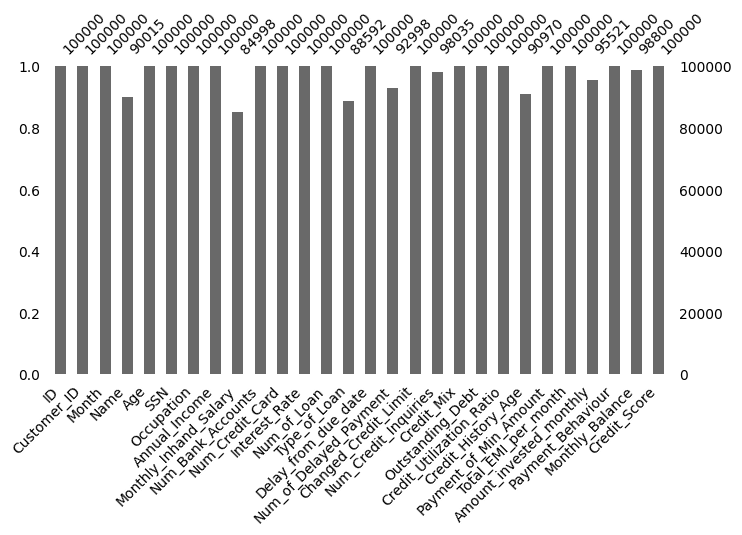

In [15]:
msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

The dataset contains missing values in the following columns: **Name**, **Monthly_Inhand_Salary**, **Type_of_Loan**, **Num_of_Delayed_Payment**, **Num_Credit_Inquiries**, **Credit_History_Age**, **Amount_invested_monthly**, and **Monthly_Balance**. These missing values need to be filled appropriately to prepare the dataset for optimal performance in a machine learning model. We will also clean and correct any erroneous or inaccurate values in the remaining columns to create a pristine dataset for achieving the best prediction results.

<font color=#ff0000> To analyze and observe the dataset more effectively, I will divide it into **3 parts** for detailed examination. </font>

# PART 1

In [17]:
# Specify the columns to include in the analysis
columns_to_use = [
    "ID", "Customer_ID", "Month", "Name", "Age", "Credit_History_Age",
    "SSN", "Occupation", "Annual_Income", "Monthly_Inhand_Salary", "Total_EMI_per_month"
]

# selecting only the specified columns
df1 = df[columns_to_use]

df1.head(10)


,ID,Customer_ID,Month,Name,Age,Credit_History_Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Total_EMI_per_month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,22 Years and 1 Months,821-00-0265,Scientist,19114.12,1824.843333,49.574949
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,NaN,821-00-0265,Scientist,19114.12,NaN,49.574949
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,22 Years and 3 Months,821-00-0265,Scientist,19114.12,NaN,49.574949
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,22 Years and 4 Months,821-00-0265,Scientist,19114.12,NaN,49.574949
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,22 Years and 5 Months,821-00-0265,Scientist,19114.12,1824.843333,49.574949
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,22 Years and 6 Months,821-00-0265,Scientist,19114.12,NaN,49.574949
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,22 Years and 7 Months,821-00-0265,Scientist,19114.12,1824.843333,49.574949
7,0x1609,CUS_0xd40,August,NaN,23,NaN,#F%$D@*&8,Scientist,19114.12,1824.843333,49.574949
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,26 Years and 7 Months,004-07-5839,_______,34847.84,3037.986667,18.816215
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,26 Years and 8 Months,004-07-5839,Teacher,34847.84,3037.986667,18.816215


In [18]:
# Convert column names to lowercase for consistency and ease of use
df1.columns = [column.lower() for column in df1.columns]

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  object 
 1   customer_id            100000 non-null  object 
 2   month                  100000 non-null  object 
 3   name                   90015 non-null   object 
 4   age                    100000 non-null  object 
 5   credit_history_age     90970 non-null   object 
 6   ssn                    100000 non-null  object 
 7   occupation             100000 non-null  object 
 8   annual_income          100000 non-null  object 
 9   monthly_inhand_salary  84998 non-null   float64
 10  total_emi_per_month    100000 non-null  float64
dtypes: float64(2), object(9)
memory usage: 8.4+ MB


In [20]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,100000,100000,0x25fd5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,100000,12500,CUS_0x942c,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,90015,10139,Stevex,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_history_age,90970,404,15 Years and 11 Months,446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssn,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,100000,18940,36585.12,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_inhand_salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333


This dataset provides customer profiles and various financial details related to credit history. Upon examining the columns, several data issues stand out:

- **ID and Customer_ID**: Contain unique values, typically used for merging or grouping operations.
- **Month**: Useful for time-based customer behavior analysis; no adjustments required.
- **Name**: Some customers have missing names (`NaN`), which can be filled using other records associated with the same `Customer_ID`.
- **Age**: Contains outliers like negative values (e.g., -500), which need to be corrected.
- **SSN**: Some entries (e.g., w`#F%$D@*&8`) are invalid and which need to be corrected
- **Occupation**: Includes meaningless values (`_______`), which should be replaced with appropriate occupations.
- **Annual_Income**: Generally appears consistent but could benefit from outlier analysis for accuracy.
- **Monthly_Inhand_Salary**: Contains missing values (`NaN`), which can be estimated using annual income.
- **Credit_History_Age**: Missing values for some customers need to be imputed with appropriate methods.
- **Total_EMI_per_month**: Appears consistent but should be checked for extreme values.

Overall, the dataset contains missing values, outliers, and inconsistencies. Addressing these issues through cleaning and preprocessing will result in a more reliable dataset, crucial for accurate analysis and machine learning model development.

## ID

In [21]:
df1["id"].duplicated().sum()  # All id's are unique?

np.int64(0)

## CUSTOMER_ID

In [22]:
# Is the number of occurrences for each customer_id the same?
(df1["customer_id"].value_counts() == 8).all()

np.True_

## MONTH

In [23]:
# Is the number of records (months) the same for each Customer id?
(df1.groupby("customer_id")["month"].count() == 8).all()

np.True_

In [25]:
# Are all the month values equal to each other for each Customer id?
filtered_df = df1.groupby("customer_id")["month"].unique()

filtered_df.apply(lambda x: set(x) == set(filtered_df.iloc[0])).all()

np.True_

In [24]:
df1["month"].value_counts()

,count
month,
January,12500
February,12500
March,12500
April,12500
May,12500
June,12500
July,12500
August,12500


## NAME

In [26]:
# Fill missing values in the "name" column with the mode of each customer group.
df1["name"] = df1.groupby("customer_id")["name"].transform(
    lambda x: x.fillna(x.mode()[0]))

# Check if each customer group in "name" has exactly 8 observations.
(df1.groupby("customer_id")["name"].count() == 8).all()

<ipython-input-26-3993766508>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["name"] = df1.groupby("customer_id")["name"].transform(


np.True_

## AGE

In [27]:
# Get the first 20 rows where the "age" column contains non-numeric values or missing data.
df1[pd.to_numeric(df1["age"], errors="coerce").isna()]["age"].head(20)

,age
8,28_
54,34_
58,30_
71,24_
89,33_
97,35_
123,30_
184,31_
227,40_
236,37_


In [28]:
df1['age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [29]:
# Clean up the "age" column by removing spaces, hyphens, and underscores.
df1['age'] = df1['age'].str.replace(' ', '').str.replace('-', '').str.replace('_', '')

# Convert the "age" column to numeric values, downcasting to the smallest integer type.
df1["age"] = pd.to_numeric(df1["age"], downcast="integer")

# Check the data type of the "age" column.
df1["age"].dtype

<ipython-input-29-3744731189>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = df1['age'].str.replace(' ', '').str.replace('-', '').str.replace('_', '')
<ipython-input-29-3744731189>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["age"] = pd.to_numeric(df1["age"], downcast="integer")


dtype('int16')

In [30]:
# Group by "customer_id" and count the occurrences of each "age" value within each group.
df1.groupby(["customer_id"]).age.value_counts().head(20)

customer_id  age 
CUS_0x1000   17      5
             18      3
CUS_0x1009   26      6
             25      2
CUS_0x100b   18      4
             19      4
CUS_0x1011   44      7
             43      1
CUS_0x1013   44      6
             43      2
CUS_0x1015   27      7
             4510    1
CUS_0x1018   15      8
CUS_0x1026   51      4
             52      4
CUS_0x102d   30      5
             31      3
CUS_0x102e   26      6
             25      2
CUS_0x1032   40      7
Name: count, dtype: int64

In [31]:
# Filter for rows where "age" is less than or equal to 100, then count the occurrences of each "age" value and sort them by age.
df1[df1['age'] <= 100]['age'].value_counts().sort_index()

,count
age,
14,1175
15,1574
16,1455
17,1502
18,2385
19,2793
20,2744
21,2716
22,2785


- Under normal circumstances, human age typically has a **maximum of 100 years.** Therefore, we will consider only ages under 100 in the dataset.

In [34]:
# Set "age" values less than 20 or greater than 56 to missing (pd.NA)
df1.loc[(df1["age"] < 20) | (df1["age"] > 56), "age"] = pd.NA

# Fill missing "age" values within each customer group using forward fill and backward fill
df1["age"] = df1.groupby("customer_id")["age"].transform(
    lambda x: x.ffill().bfill()
)

# Count the number of missing "age" values
df1["age"].isna().sum()

<ipython-input-34-2342629590>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["age"] = df1.groupby("customer_id")["age"].transform(


np.int64(10360)

- Based on the output, there are **4 values** greater than 56, which can be considered outliers. Therefore, we filtered the data to include only values up to 56.

- **A limit of 20 years** can be set as the minimum age for being employed or eligible for a credit card. Therefore, any values under 20 years will be assigned as missing values.

In [35]:
# Fill missing "age" values with the median of the "age" column.
df1["age"].fillna(df1["age"].median(), inplace=True)

# Count the number of missing "age" values.
df1["age"].isna().sum()

<ipython-input-35-2383353316>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["age"].fillna(df1["age"].median(), inplace=True)


np.int64(0)

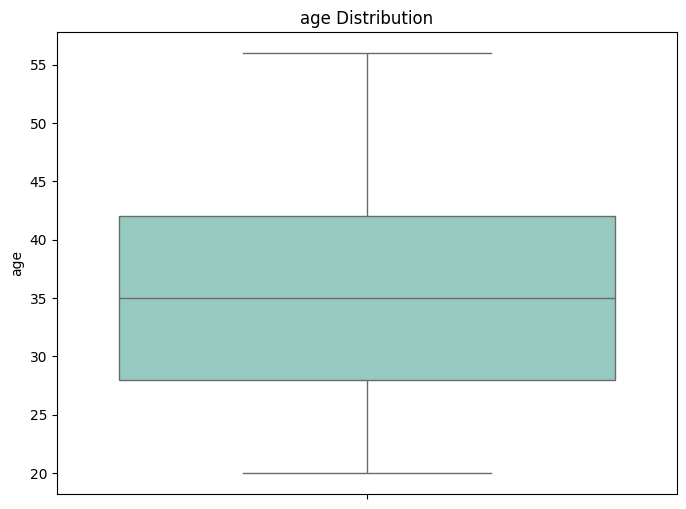

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y="age", palette="Set3")
plt.title("age Distribution")
plt.show()

## SSN

In [37]:
df1.ssn.value_counts()

,count
ssn,
#F%$D@*&8,5572
940-15-4402,8
571-35-3463,8
422-50-2476,8
430-60-9262,8
...,...
604-62-6133,4
331-28-1921,4
838-33-4811,4


In [38]:
# Mark invalid SSN values as NaN
df1['ssn'] = df1['ssn'].replace('#F%$D@*&8', np.nan)

# Group by "customer_id" and fill missing SSNs with the most frequent value within each group
df1['ssn'] = df1.groupby('customer_id')['ssn'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Display the number of missing SSN values
df1["ssn"].isna().sum()

<ipython-input-38-603920273>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ssn'] = df1['ssn'].replace('#F%$D@*&8', np.nan)
<ipython-input-38-603920273>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ssn'] = df1.groupby('customer_id')['ssn'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


np.int64(0)

In [39]:
df1.ssn.value_counts()

,count
ssn,
078-73-5990,8
821-00-0265,8
004-07-5839,8
486-85-3974,8
061-64-3430,8
...,...
070-19-1622,8
500-92-6408,8
411-51-0676,8


- Upon further inspection, we observed that for every 8 SSNs, the **customer_id** is consistently 12500. This indicates that the data has been correctly filled and the data imputation process has been done accurately.

## OCCUPATION

In [40]:
df1.occupation.value_counts()

,count
occupation,
_______,7062
Lawyer,6575
Architect,6355
Engineer,6350
Scientist,6299
Mechanic,6291
Accountant,6271
Developer,6235
Media_Manager,6232


In [41]:
# Fill "_______" occupation values with the most frequent occupation within each customer group
df1["occupation"] = df1.groupby("customer_id")["occupation"].transform(
    lambda x: x.where(x != "_______", x[x != "_______"].mode().iloc[0]))

# The count of unique occupation values
df1["occupation"].value_counts()

<ipython-input-41-3447533333>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["occupation"] = df1.groupby("customer_id")["occupation"].transform(


,count
occupation,
Lawyer,7096
Engineer,6864
Architect,6824
Mechanic,6776
Accountant,6744
Scientist,6744
Media_Manager,6720
Developer,6720
Teacher,6672


In [42]:
# Count the number of customers with only one unique occupation
(df1.groupby("customer_id")["occupation"].nunique() == 1).sum()  # 12500X8 = 100000

np.int64(12500)

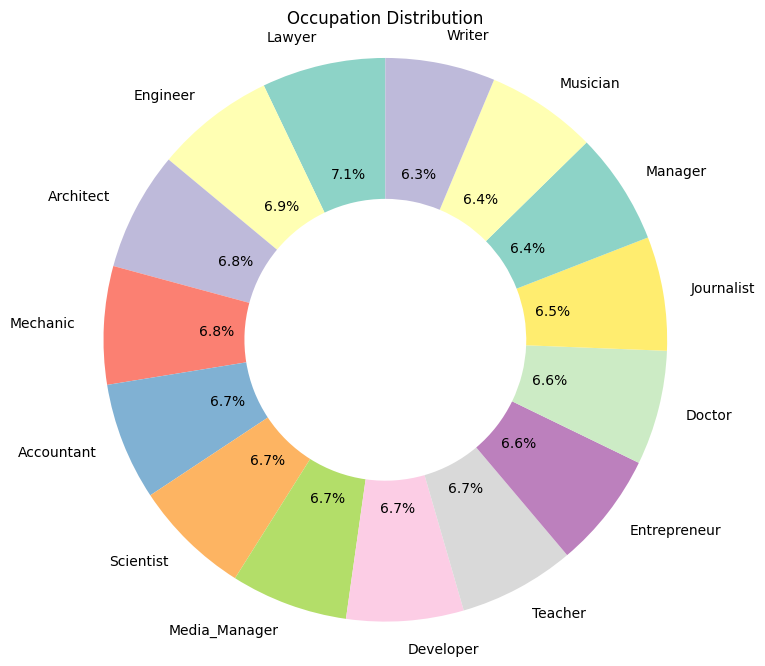

In [43]:
plt.figure(figsize=(8, 8))
plt.pie(df1["occupation"].value_counts(),
        labels=df1["occupation"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("Occupation Distribution")
plt.axis('equal')
plt.show()

- Here, the distribution graph of **occupation** across different categories is observed. This helps in analyzing the frequency and spread of various occupations within the dataset.

## MONTHLY_INHAND_SALARY

In [44]:
df1.monthly_inhand_salary.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: monthly_inhand_salary
Non-Null Count  Dtype  
--------------  -----  
84998 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [45]:
# Fill missing "monthly_inhand_salary" values using forward and backward fill methods within each customer group
df1["monthly_inhand_salary"] = df1.groupby(
    "customer_id")["monthly_inhand_salary"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Check the number of missing values in "monthly_inhand_salary"
df1["monthly_inhand_salary"].isna().sum()

<ipython-input-45-3864236729>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["monthly_inhand_salary"] = df1.groupby(


np.int64(0)

In [46]:
df1["monthly_inhand_salary"].value_counts().sample(10)

,count
monthly_inhand_salary,
1782.631667,8
6708.970000,8
1548.348333,8
6134.536667,8
5238.398333,8
6269.790000,8
835.971667,8
2898.385000,8
4551.950000,8


In [70]:
df1["monthly_inhand_salary"] = df["Monthly_Inhand_Salary"]

<ipython-input-70-4257476214>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["monthly_inhand_salary"] = df["Monthly_Inhand_Salary"]


In [76]:
# Check the maximum difference between unique monthly_inhand_salary values for each customer
filtered_df = df1.groupby("customer_id")["monthly_inhand_salary"].unique()

# Calculate the maximum difference (max - min) for customers with more than one unique salary
diff = filtered_df.apply(lambda x: np.max(x) - np.min(x) if len(x) > 1 else 0).max()  # Maximum difference is reasonable
print(diff)

df1.groupby("customer_id")["monthly_inhand_salary"].nunique().unique()

1634.2132813235112


array([1, 2])

- Each group contains a unique customer ID, and the salary should be the same across all entries within the same group. Therefore, we will correct any inconsistent salary values within the groups, ensuring that the salary values are uniform across each group.

In [116]:
# Điền giá trị thiếu trong cột monthly_inhand_salary theo nhóm customer_id
df1["monthly_inhand_salary"] = df1.groupby("customer_id")["monthly_inhand_salary"]\
    .transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

In [77]:
# # Define the function to fix salary values
# def fix_salary(x):
#     if x.max() - x.min() > 0:  # If there's a significant difference in salaries
#         mode_value = x.mode()[0] if not x.mode().empty else x.median()  # Get mode or median if no mode
#         return x.fillna(mode_value).apply(lambda _: mode_value)  # Fill missing values with mode/median
#     return x  # Return unchanged if no difference

# # Apply the fix_salary function to the monthly_inhand_salary column grouped by customer_id
# df1["monthly_inhand_salary"] = df1.groupby("customer_id")["monthly_inhand_salary"].transform(fix_salary)

<ipython-input-77-712346529>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["monthly_inhand_salary"] = df1.groupby("customer_id")["monthly_inhand_salary"].transform(fix_salary)


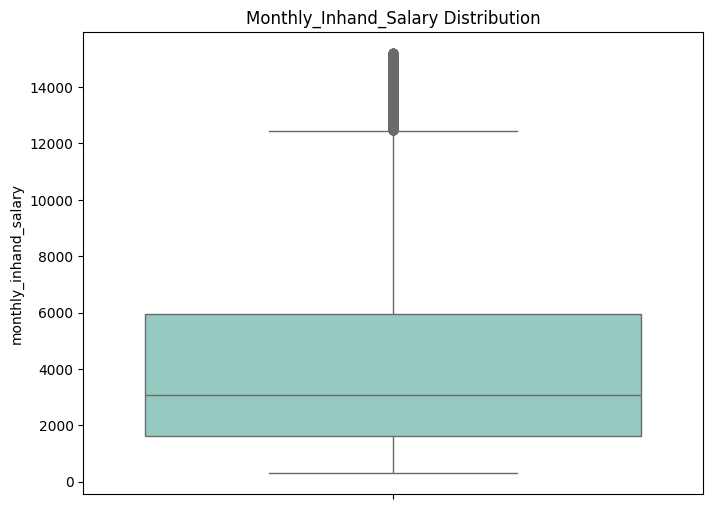

In [117]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y="monthly_inhand_salary", palette="Set3")
plt.title("Monthly_Inhand_Salary Distribution")
plt.show()

- The graph shows that **monthly_inhand_salary** is **not 0**, indicating that the filled values are appropriately completed. This suggests that the data imputation for this column was carried out correctly.
- Even though the occupations are the same, different salary amounts can be received, and these can be either very low or very high. Therefore, we consider these outliers to be valid in this context and accept them as correct.

## ANNUAL_INCOME

In [56]:
# Filter and display the first 20 invalid (non-numeric) values in the 'annual_income' column
df1[pd.to_numeric(df1["annual_income"], errors="coerce").isna()]["annual_income"].head(20)

,annual_income
10,34847.84_
27,30689.89_
32,35547.71_
56,34081.38_
66,114838.41_
94,88640.24_
98,54392.16_
106,8701.545_
111,8701.545_
115,25546.26_


In [57]:
# Remove '_' characters from the 'annual_income' column
df1["annual_income"] = df1["annual_income"].str.strip("_")

# Convert the 'annual_income' column to a numeric (integer) format
df1["annual_income"] = pd.to_numeric(df1["annual_income"], downcast="integer")

# Check the data type of the 'annual_income' column
df1["annual_income"].dtype

<ipython-input-57-1032513893>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["annual_income"] = df1["annual_income"].str.strip("_")
<ipython-input-57-1032513893>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["annual_income"] = pd.to_numeric(df1["annual_income"], downcast="integer")


dtype('float64')

In [58]:
# Display unique annual_income values for each customer group and randomly sample 20 groups
df1.groupby("customer_id")["annual_income"].unique().sample(10)

,annual_income
customer_id,
CUS_0x5dd6,[48302.48]
CUS_0x4c77,[9349.475]
CUS_0xa71a,[15713.83]
CUS_0x9281,[46352.82]
CUS_0x86aa,[54525.94]
CUS_0x8c9a,[118172.63999999998]
CUS_0x1d79,[29661.88]
CUS_0x9b03,[122847.88]
CUS_0x2b06,[71614.2]


In [59]:
# Count the occurrences of each annual_income value within customer groups and summarize their frequency
df1.groupby("customer_id")["annual_income"].value_counts().value_counts()

,count
count,
8,11535
1,999
7,933
6,30
5,2


- When we check how many times the same value repeats in the **annual_income** column for each customer group **customer_id**, we observe occurrences such as 1, 7, 6, and 5. This indicates that there are values within the customer groups that need correction. Under normal circumstances, we should see a consistent value of **12500** for each customer group, as expected from the calculation (8 * 12500 = 100,000).

In [61]:
# Check the difference between annual income and the product of monthly salary times 12
df1[df1["annual_income"] != df1["monthly_inhand_salary"] * 12]

,id,customer_id,month,name,age,credit_history_age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,22 Years and 1 Months,821-00-0265,Scientist,19114.12,1824.843333,49.574949
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,NaN,821-00-0265,Scientist,19114.12,1824.843333,49.574949
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,22 Years and 3 Months,821-00-0265,Scientist,19114.12,1824.843333,49.574949
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,22 Years and 4 Months,821-00-0265,Scientist,19114.12,1824.843333,49.574949
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,22 Years and 5 Months,821-00-0265,Scientist,19114.12,1824.843333,49.574949
...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,31 Years and 6 Months,078-73-5990,Mechanic,39628.99,3359.415833,35.104023
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,31 Years and 7 Months,078-73-5990,Mechanic,39628.99,3359.415833,35.104023
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,31 Years and 8 Months,078-73-5990,Mechanic,39628.99,3359.415833,35.104023
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,31 Years and 9 Months,078-73-5990,Mechanic,39628.99,3359.415833,35.104023


In [83]:
# Filter rows where annual income is greater than monthly salary * 18
filtered_df = df1[df1["annual_income"] > df1["monthly_inhand_salary"] * 18]

- The reason for taking 18 times the monthly income is to account for potential increases due to bonuses or additional income. This represents the maximum possible increase and is set as a **critical threshold**, equivalent to 1.5 times the annual income.

In [84]:
# Calculate the mode of 'annual_income' for each customer
filtered_df = df1.groupby("customer_id")["annual_income"].agg(
    lambda x: x.mode().iloc[0])

# Replace 'annual_income' values if they exceed 1.5 years' worth of 'monthly_inhand_salary',
# with the mode value calculated for each customer.
df1.loc[df1["annual_income"] > df1["monthly_inhand_salary"] * 18,
        "annual_income"] = df1["customer_id"].map(filtered_df)

In [85]:
df1.groupby("customer_id")["annual_income"].value_counts().value_counts()
#all annual_income values of customers are one unique value

,count
count,
8,12500


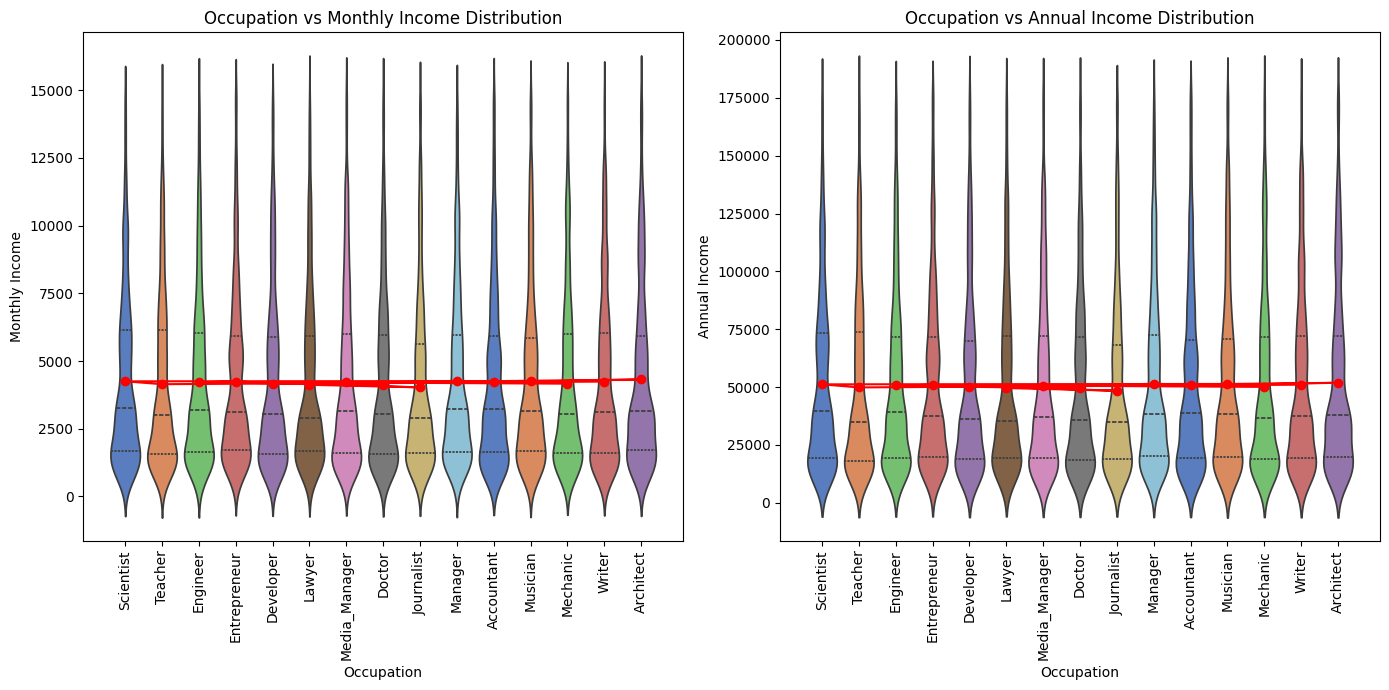

In [118]:
# Adjust figure size
plt.figure(figsize=(14, 7))

# First subplot: Monthly income distribution by occupation
plt.subplot(1, 2, 1)
sns.violinplot(data=df1, x="occupation", y="monthly_inhand_salary", inner="quart", palette="muted")

# Calculate the mean of monthly income and add a point
mean_monthly_salary = df1.groupby("occupation")["monthly_inhand_salary"].mean()
for i, occupation in enumerate(df1["occupation"].unique()):
    mean_value = mean_monthly_salary[occupation]

# Add a line connecting the mean values of monthly income
plt.plot(mean_monthly_salary.index, mean_monthly_salary.values, color='red', linestyle='-', marker='o', zorder=4)

plt.title('Occupation vs Monthly Income Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Occupation')
plt.ylabel('Monthly Income')

# Second subplot: Annual income distribution by occupation
plt.subplot(1, 2, 2)
sns.violinplot(data=df1, x="occupation", y="annual_income", inner="quart", palette="muted")

# Calculate the mean of annual income and add a point
mean_annual_income = df1.groupby("occupation")["annual_income"].mean()
for i, occupation in enumerate(df1["occupation"].unique()):
    mean_value = mean_annual_income[occupation]

# Add a line connecting the mean values of annual income
plt.plot(mean_annual_income.index, mean_annual_income.values, color='red', linestyle='-', marker='o', zorder=4)

plt.title('Occupation vs Annual Income Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Occupation')
plt.ylabel('Annual Income')

# Show the plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

- As seen in the graph, when we compare **Annual Income** and **monthly_inhand_salary** side by side, the average follows the red line, and both graphs yield the same result. This indicates that the data has been cleaned correctly and consistently.

## TOTAL_EMI_PER_MONTH

In [88]:
# Grouping the DataFrame by 'customer_id' and then getting the count of each unique 'total_emi_per_month' value for each customer.
df1.groupby("customer_id")["total_emi_per_month"].value_counts().value_counts()

,count
count,
8,9074
1,3385
7,2524
6,504
4,270
3,233
2,226
5,220


- For each customer group **customer_id**, **total_emi_per_month** should be the same. In other words, each **customer_id** should have 8 entries, but there are discrepancies with other values. We need to correct those inconsistent values.

In [93]:
# Step 2: Replace 'total_emi_per_month' values with the most frequent value for each 'customer_id'
# We will first find the mode for each customer and use it to replace the values
df1['total_emi_per_month'] = df1.groupby('customer_id')['total_emi_per_month'].transform(
    lambda x: x.mode().iloc[0])

<ipython-input-93-975443285>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_emi_per_month'] = df1.groupby('customer_id')['total_emi_per_month'].transform(


In [94]:
df1.groupby("customer_id")["total_emi_per_month"].value_counts().value_counts()

,count
count,
8,12500


In [95]:
#The value of total_emi_per_month is typically around 30%-40% of the monthly income.
df1.loc[df1["total_emi_per_month"] > df1["monthly_inhand_salary"] * 0.3].count()

,0
id,0
customer_id,0
month,0
name,0
age,0
credit_history_age,0
ssn,0
occupation,0
annual_income,0
monthly_inhand_salary,0


In [96]:
# Is there any other erroneous value?
filtered_df = df1.groupby(
    "customer_id")["total_emi_per_month"].nunique().loc[lambda x: x > 1].index

df1[df1["customer_id"].isin(filtered_df)].groupby(
    "customer_id")["total_emi_per_month"].value_counts().head(20)

,,count
customer_id,total_emi_per_month,


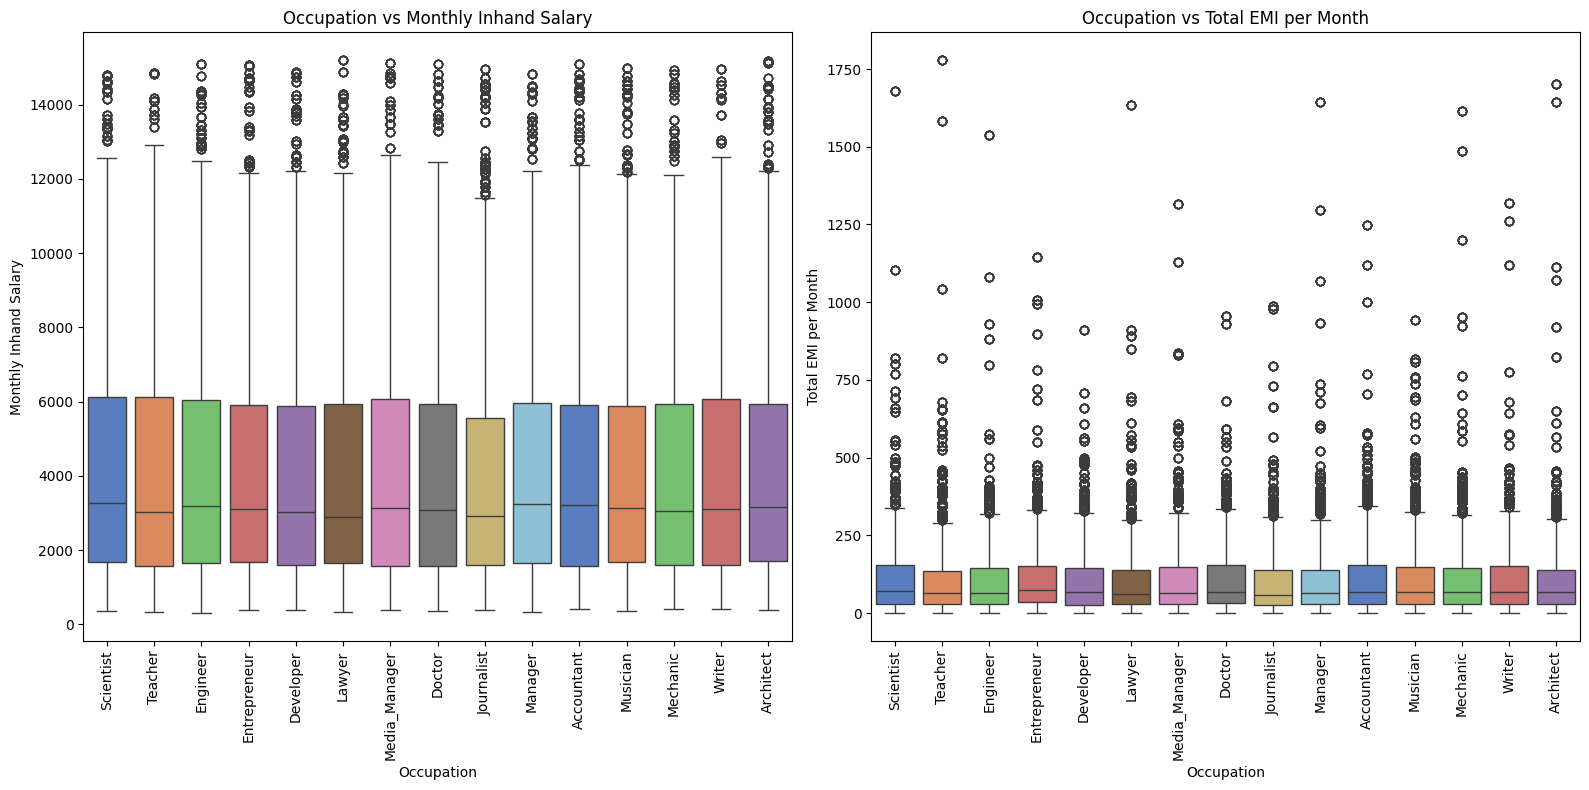

In [97]:
# Set the figure size for the plots
plt.figure(figsize=(16, 8))

# Draw the first plot: Occupation vs Monthly Inhand Salary
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.boxplot(data=df1, x="occupation", y="monthly_inhand_salary", palette="muted")
plt.title('Occupation vs Monthly Inhand Salary')
plt.xlabel('Occupation')
plt.ylabel('Monthly Inhand Salary')
plt.xticks(rotation=90)  # Rotate the occupation names on the x-axis

# Draw the second plot: Occupation vs Total EMI per Month
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.boxplot(data=df1, x="occupation", y="total_emi_per_month", palette="muted")
plt.title('Occupation vs Total EMI per Month')
plt.xlabel('Occupation')
plt.ylabel('Total EMI per Month')
plt.xticks(rotation=90)  # Rotate the occupation names on the x-axis

# Display the plots
plt.tight_layout()  # Adjust the layout to make the plots more organized
plt.show()

## CREDIT_HISTORY_AGE

In [98]:
# Counting the occurrences of each value in the 'credit_history_age' column, including missing values (NaN),
# and displaying the top 20 most frequent values.
df1["credit_history_age"].value_counts(dropna=False).head(20)

,count
credit_history_age,
NaN,9030
15 Years and 11 Months,446
19 Years and 4 Months,445
19 Years and 5 Months,444
17 Years and 11 Months,443
19 Years and 3 Months,441
17 Years and 9 Months,438
15 Years and 10 Months,436
17 Years and 10 Months,435


In [100]:
#Calculate the month from the entire string
def convert_age_to_months(history_age):
    if pd.notna(history_age):  # NaN checking
        match = re.match(r"(\d+) Years\s*and\s*(\d+) Months", history_age)  # Regex
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            total_months = years * 12 + months
            return total_months
    return np.nan  #Return NaN if there is no match or if it is NaN

In [101]:
# Creating a new column 'credit_history_age_regulated' by applying the 'convert_age_to_months' function
# to the 'credit_history_age' column, transforming the age values into months.

df1["credit_history_age"] = df1["credit_history_age"].transform(convert_age_to_months)

<ipython-input-101-1207195591>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["credit_history_age"] = df1["credit_history_age"].transform(convert_age_to_months)


In [ ]:
# df1["credit_history_age"] = df1['credit_history_age_regulated']

In [102]:
df1["credit_history_age"].head(10)

,credit_history_age
0,265.0
1,NaN
2,267.0
3,268.0
4,269.0
5,270.0
6,271.0
7,NaN
8,319.0
9,320.0


- In the function we wrote, we convert the years in the dataset into months, and we can observe the ordering of the values here. This helps in analyzing the data with a monthly perspective rather than yearly.

In [103]:
def fill_nan(group):
    # First loop: Fill NaN values with the previous value + 1
    for i in range(len(group)):
        if pd.isna(group.loc[group.index[i], "credit_history_age"]):
            # Get the previous value
            if i > 0:
                group.loc[group.index[i], "credit_history_age"] = (
                    group.loc[group.index[i - 1], "credit_history_age"] + 1
                )
            else:
                group.loc[group.index[i], "credit_history_age"] = np.nan

    # Second loop: Fill NaN values by looking forward (backward fill)
    for i in range(len(group) - 1, -1, -1):
        if pd.isna(group.loc[group.index[i], "credit_history_age"]):
            if i < len(group) - 1:
                group.loc[group.index[i], "credit_history_age"] = (
                    group.loc[group.index[i + 1], "credit_history_age"] - 1
                )

    return group

- This function fills missing (NaN) values in the credit_history_age column in two stages: First, it fills each NaN with the previous value plus 1, leaving the first missing value as NaN. In the second stage, it fills missing values with the next value minus 1. This process helps make the missing data more consistent

In [104]:
# Grouping the DataFrame by 'customer_id' and applying the 'fill_nan' function to each group
# The 'group_keys=False' ensures that the group labels are not included in the result.
df1 = df1.groupby("customer_id", group_keys=False).apply(fill_nan)

<ipython-input-104-1287867285>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1 = df1.groupby("customer_id", group_keys=False).apply(fill_nan)


In [106]:
# Checking the validity of the credit history
def detect_invalid_credit_history(row):
    """
    Checks the validity of the credit history.
    - The age should not be greater than the credit history.
    - The difference between the age and credit history should not be greater than 18 years.
    """
    # Case where the age is greater than the credit history or the difference between age and credit history exceeds 18 years
    if (row['age'] * 12 - row['credit_history_age']) >= 18 * 12:
        return True
    else:
        return False

# Checking the credit history and marking it as valid/invalid
df1['critic_kontrol'] = df1.apply(lambda row: detect_invalid_credit_history(row), axis=1)

# Separating valid and invalid data
valid_data = df1[df1['critic_kontrol']]  # Valid data
invalid_data = df1[~df1['critic_kontrol']]  # Invalid data

# Summarizing the results
print("Number of valid records:", valid_data.shape[0])
print("Number of invalid records:", invalid_data.shape[0])

Number of valid records: 48737
Number of invalid records: 51263


 - This function checks whether a user's age is greater than their credit history and whether the difference between age and credit history exceeds 18 years. If either condition is met, the user is marked as invalid. The check is then applied to the entire dataset, separating valid and invalid records, and the count of each category is printed.

In [109]:
# Detecting invalid credit history data and marking it as NaN
def mark_invalid_credit_history(row):
    """
    Detects invalid credit history data and marks them as NaN:
    - The age should be greater than the credit history.
    - The credit history should be consistent with the age (the starting age should logically be 18).
    """
    age_in_months = row['age'] * 12
    if not (age_in_months - row['credit_history_age']) >= 18*12:
        return np.nan  # Invalid data is marked as NaN
    return row['credit_history_age']  # Valid data is kept

# Marking invalid data as NaN
df1['credit_history_age'] = df1.apply(mark_invalid_credit_history, axis=1)

# Checking the results
print("Updated column statistics:")
print(df1['credit_history_age'].describe())

Updated column statistics:
count    48737.000000
mean       174.132446
std         92.271479
min          1.000000
25%        100.000000
50%        168.000000
75%        234.000000
max        404.000000
Name: credit_history_age, dtype: float64


In [110]:
# Multiply age by 12 and observe alongside 'credit_history_age'
invalid_data_subset = invalid_data.copy()  # Create a copy of the invalid_data DataFrame
invalid_data_subset['age_in_months'] = invalid_data_subset['age'] * 12  # Convert age to months

# Observe the last 50 invalid records
invalid_data_subset = invalid_data_subset[['age_in_months', 'credit_history_age']].head(10)

print(invalid_data_subset)

   age_in_months  credit_history_age
0          276.0               265.0
1          276.0               266.0
2          276.0               267.0
3          276.0               268.0
4          276.0               269.0
5          276.0               270.0
6          276.0               271.0
7          276.0               272.0
8          336.0               319.0
9          336.0               320.0


In [111]:
# Function to fill missing credit history values randomly
def fill_missing_credit_history(row):
    """
    Fills missing credit history values randomly based on age:
    - <25 years: Maximum 6*12 months.
    - 25-35 years: Maximum 16*12 months.
    - 35-45 years: Maximum 26*12 months.
    - 45+ years: Maximum 38*12 months.
    """
    # Mean and standard deviation for random value generation
    mean = 2200  # Mean value
    std_dev = 1000  # Standard deviation

    # Dictionary to store maximum months based on age ranges
    age_limits = {
        (0, 20): 6 * 12,  # For ages <= 20, max 72 months
        (20, 30): 12 * 12,  # For ages 20-30, max 144 months
        (30, 40): 18 * 12,  # For ages 30-40, max 216 months
        (40, 50): 24 * 12,  # For ages 40-50, max 288 months
        (50, float('inf')): 30 * 12  # For ages 50+, max 360 months
    }

    if pd.isna(row['credit_history_age']):  # Process only for missing values
        age_in_months = row['age'] * 12  # Convert age to months

        # Select the maximum months based on age
        for age_range, max_months in age_limits.items():
            if age_range[0] <= row['age'] < age_range[1]:
                break

        # Choose a random value from a normal distribution
        random_value = int(np.random.normal(loc=mean, scale=std_dev))

        # Check the conditions: The selected random value should fit the age range
        # and the difference between age and credit history should be at least 216 months
        while not (0 <= random_value <= max_months and (age_in_months - random_value) >= 216):
            random_value = int(np.random.normal(loc=mean, scale=std_dev))  # Generate a new random value

        return random_value
    else:
        return row['credit_history_age']  # Keep non-missing values unchanged

-  
This script fills the missing credit_history_age values randomly based on the age of the person. First, it defines a specific maximum credit history duration (in months) for each age group, based on age. If a person's credit_history_age value is missing, it determines the appropriate maximum value based on age and randomly generates this value using a normal distribution. The generated random value must match the age and ensure that the difference between age and credit history is at least 216 months. A random value is generated again until a value meeting these conditions is found and then the missing field is filled with this value. The script only processes the missing data and keeps all other data intact.

In [112]:
# Applying the function to the DataFrame
df1['credit_history_age'] = df1.apply(fill_missing_credit_history, axis=1)

In [119]:
# df1.drop('critic_kontrol', axis=1, inplace=True) #We had written the **critic_kontrol** function earlier, but it is no longer necessary.

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  object 
 1   customer_id            100000 non-null  object 
 2   month                  100000 non-null  object 
 3   name                   100000 non-null  object 
 4   age                    100000 non-null  float64
 5   credit_history_age     100000 non-null  float64
 6   ssn                    100000 non-null  object 
 7   occupation             100000 non-null  object 
 8   annual_income          100000 non-null  float64
 9   monthly_inhand_salary  100000 non-null  float64
 10  total_emi_per_month    100000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 11.2+ MB


- All the data in **Part 1** has been successfully filled without any data loss. As seen in the table, the number of rows in all columns should be 100,000, indicating that the data was properly handled and completed.

# PART 2

In [121]:
# Specify the columns to include in the analysis
columns_to_use = [
    "Customer_ID", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
    "Num_of_Loan", "Type_of_Loan", "Delay_from_due_date",
    "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries",
    "Credit_Mix", "Outstanding_Debt"
]
# Load the dataset, selecting only the specified columns
df2 = df[columns_to_use]

# Display the first five rows of the filtered dataset
df2.head(10)

,Customer_ID,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
0,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98
1,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98
2,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98
3,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98
4,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98
5,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98
6,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98
7,CUS_0xd40,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98
8,CUS_0x21b1,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03
9,CUS_0x21b1,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03


Here is the general overview of the dataset summarized point by point
.
- **Num_Bank_Accounts**: The number of bank accounts per customer is mostly consistent. However, very high values (e.g., 20+ bank accounts) could be suspicious and should be checked for outliers during data cleaning.
- **Num_Credit_Card**: The number of credit cards is consistent, but similarly to bank accounts, unusually high numbers should be checked and cleaned if necessary.
- **Interest_Rate**: Interest rates should generally be numerical, but unusual (very low or very high) values should be checked. Outliers should be cleaned if necessary.
- **Num_of_Loan**: The number of loans taken by customers is consistent. However, if there are unusually large numbers of loans, it should be verified.
- **Type_of_Loan**: The loan type is categorical, indicating different types of loans. If there are inconsistencies or missing values, these should be addressed.
- **Delay_from_due_date**: The delay from the due date contains some negative values (-1), which are nonsensical and need to be corrected.
- **Num_of_Delayed_Payment**: The number of delayed payments contains missing values (NaN). These missing values should be filled using an appropriate method (e.g., median or mode).
- **Changed_Credit_Limit**: The changed credit limit is a numerical value. Missing or nonsensical values (e.g., `_` or extremely high/low limits) should be reviewed and corrected.
- **Num_Credit_Inquiries**: The number of credit inquiries is usually consistent, but unusually high numbers should be verified.
- **Credit_Mix**: The credit mix is typically categorical (e.g., "Good"). However, there are placeholders like `_` for missing or erroneous values, which should be addressed.
- **Outstanding_Debt**: Outstanding debt is numerical and generally consistent. Negative debt values or other nonsensical entries shou.inconsistent values.

In [122]:
# Convert column names to lowercase for consistency and ease of use
df2.columns = [column.lower() for column in df2.columns]

In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             100000 non-null  object 
 1   num_bank_accounts       100000 non-null  int64  
 2   num_credit_card         100000 non-null  int64  
 3   interest_rate           100000 non-null  int64  
 4   num_of_loan             100000 non-null  object 
 5   type_of_loan            88592 non-null   object 
 6   delay_from_due_date     100000 non-null  int64  
 7   num_of_delayed_payment  92998 non-null   object 
 8   changed_credit_limit    100000 non-null  object 
 9   num_credit_inquiries    98035 non-null   float64
 10  credit_mix              100000 non-null  object 
 11  outstanding_debt        100000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 9.2+ MB


## NUM_BANK_ACCOUNTS

In [124]:
# Group the DataFrame by 'customer_id'
# Calculate the value counts for combinations of 'num_bank_accounts' and 'num_credit_card' within each group
# Display the top 20 most frequent combinations across all customer groups
df2.groupby(["customer_id"])[["num_bank_accounts", "num_credit_card"]].value_counts().head(20)

,,,count
customer_id,num_bank_accounts,num_credit_card,
CUS_0x1000,6,5,8
CUS_0x1009,6,5,8
CUS_0x100b,1,4,8
CUS_0x1011,3,3,8
CUS_0x1013,3,3,8
CUS_0x1015,7,4,8
CUS_0x1018,7,7,8
CUS_0x1026,2,6,8
CUS_0x102d,5,3,7


- We are examining the consistency between credit card transactions and bank account balances to identify whether there are any outliers or significant discrepancies between them. This helps ensure data reliability and detect any extreme differences.

In [125]:
# Count unique values in 'num_bank_accounts', sort by value, and show the first 20.
df2["num_bank_accounts"].value_counts().sort_index().head(20)

,count
num_bank_accounts,
-1,21
0,4328
1,4490
2,4304
3,11950
4,12186
5,12118
6,13001
7,12823


- When we sort the data in ascending order, we observe that the value **-1** is incorrect and that calculations beyond **11** are nonsensical. Therefore, we will clean these erroneous values from the dataset.

In [126]:
# Replace invalid 'num_bank_accounts' values (<0 or >11) with NaN.
df2.loc[(df2["num_bank_accounts"] < 0) | (df2["num_bank_accounts"] > 11),
        "num_bank_accounts"] = pd.NA

# Fill NaN values in 'num_bank_accounts' within each 'customer_id' group:
# - Forward-fill (ffill) fills NaN with the previous valid value.
# - Backward-fill (bfill) fills NaN with the next valid value if no previous value exists.
df2["num_bank_accounts"] = df2.groupby(
    "customer_id")["num_bank_accounts"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Count and return the number of remaining NaN values in 'num_bank_accounts'.
df2["num_bank_accounts"].isna().sum()

<ipython-input-126-3529881688>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_bank_accounts"] = df2.groupby(


np.int64(0)

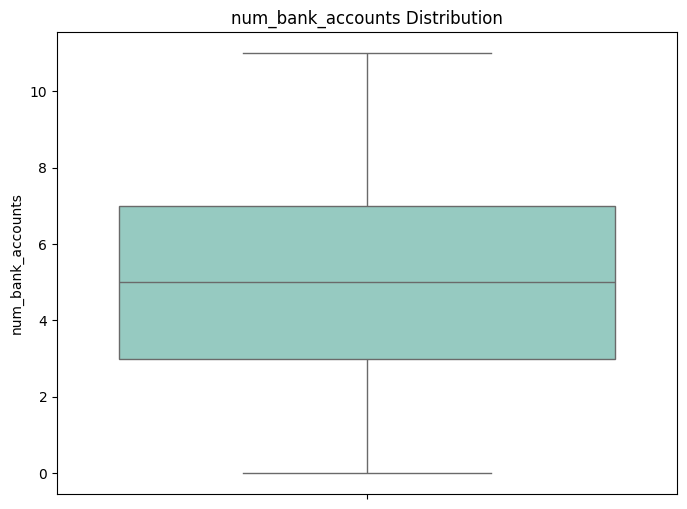

In [127]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y="num_bank_accounts", palette="Set3")
plt.title("num_bank_accounts Distribution")
plt.show()

## NUM_CREDİT_CARD

In [128]:
# Count unique values in 'num_credit_card', sort by value, and show the first 20
df2["num_credit_card"].value_counts().sort_index().head(20)

,count
num_credit_card,
0,13
1,2132
2,2149
3,13277
4,14030
5,18459
6,16559
7,16615
8,4956


In [130]:
# Replace 'num_credit_card' values greater than 11 with NaN.
df2.loc[df2["num_credit_card"] > 10, "num_credit_card"] = pd.NA

# Fill NaN values in 'num_credit_card' within each 'customer_id' group:
# - Forward-fill (ffill) uses the previous valid value.
# - Backward-fill (bfill) uses the next valid value if no previous value exists.
df2["num_credit_card"] = df2.groupby(
    "customer_id")["num_credit_card"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Count and return the number of remaining NaN values in 'num_credit_card'.
df2["num_credit_card"].isna().sum()

<ipython-input-130-1830297524>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_credit_card"] = df2.groupby(


np.int64(0)

-  Therefore, we will clean all values beyond **10** to maintain consistency in the data.

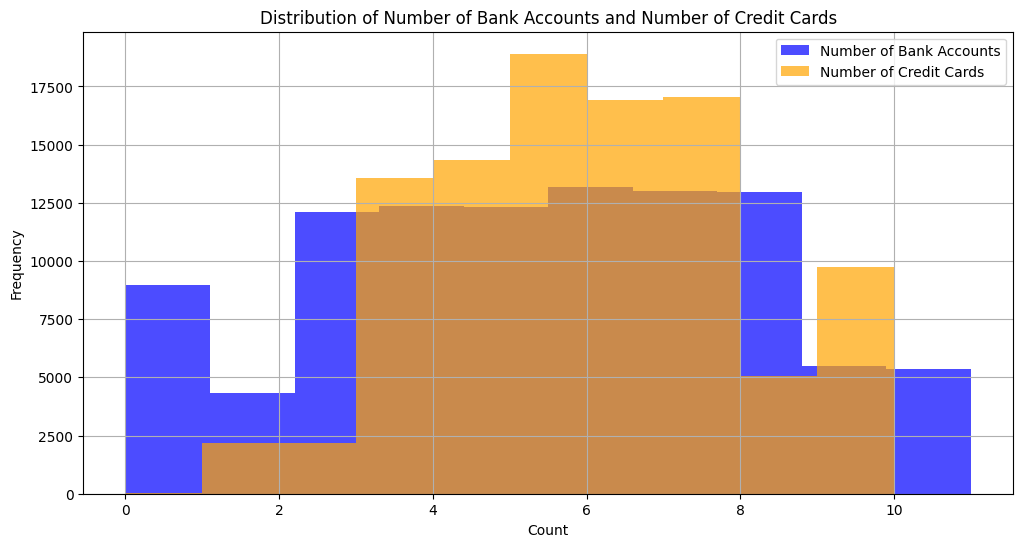

In [131]:
# Set up the figure with a specific size.
plt.figure(figsize=(12, 6))  # Define the size of the plot (width, height)

# Create a histogram for 'num_bank_accounts' with blue color and some transparency.
plt.hist(df2["num_bank_accounts"], bins=10, color='blue', alpha=0.7, label="Number of Bank Accounts")  # Plot histogram for 'num_bank_accounts'

# Create a histogram for 'num_credit_card' with orange color and some transparency.
plt.hist(df2["num_credit_card"], bins=10, color='orange', alpha=0.7, label="Number of Credit Cards")  # Plot histogram for 'num_credit_card'

# Add title, axis labels, and a legend to the plot.
plt.title("Distribution of Number of Bank Accounts and Number of Credit Cards")  # Set the title of the plot
plt.xlabel("Count")  # Label for the x-axis
plt.ylabel("Frequency")  # Label for the y-axis
plt.legend()  # Display the legend to identify each histogram

# Add a grid to make the visualization clearer.
plt.grid(True)  # Enable grid lines for better readability

# Display the plot.
plt.show()  # Show the plot

- **Credit Card and Bank Account Balance:**  
If an individual has a high number of credit cards but few bank accounts, it may indicate heavy reliance on credit tools. This suggests a spending-focused financial strategy. On the other hand, if an individual has many bank accounts but few credit cards, it implies a focus on savings and account management.

**0-2 Range:**  
The number of individuals with 0-2 bank accounts appears higher than those with credit cards. This could indicate that at the initial stages, people prioritize opening bank accounts over acquiring credit cards. For example, individuals may first open bank accounts for investments or salary purposes before exploring credit card options.  

**3-7 Range:**  
In the range of 3 to 7, credit card ownership surpasses the number of bank accounts. This suggests that individuals are addressing their financial needs by turning to credit cards rather than increasing the number of bank accounts. This preference could be driven by the benefits credit cards offer, such as reward points and installment payment options.  

**8 and Beyond:**  
For values of 8 and above, bank account ownership increases again, while credit card ownership decreases relatively. Although this may seem puzzling, it could be interpreted as follows:  
- **Potential Corporate Accounts:** Individuals with 8 or more bank accounts are likely to be small or medium-sized business owners who use multiple accounts for various business operations.  
- **Individual Strategy:** Instead of relying on credit cards, these individuals may prefer to manage their investments or financial transactions primarily through bank accounts.

## INTEREST_RATE

In [132]:
# Count unique values in 'interest_rat', sort by value, and show the first 50
df2.interest_rate.value_counts().sort_index().head(50)

,count
interest_rate,
1,2683
2,2465
3,2765
4,2589
5,4979
6,4721
7,4494
8,5012
9,4494


In [133]:
# Replace outlier values in 'interest_rate' greater than 34 with NaN
df2.loc[df2["interest_rate"] > 34, "interest_rate"] = pd.NA

# Fill missing values in 'interest_rate' with the mode (most frequent value) within each 'customer_id' group
df2["interest_rate"] = df2.groupby("customer_id")["interest_rate"].transform(
    lambda x: x.fillna(x.mode()[0]))

# Check the count of remaining NaN values in 'interest_rate'
df2["interest_rate"].isna().sum()

<ipython-input-133-2947012822>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["interest_rate"] = df2.groupby("customer_id")["interest_rate"].transform(


np.int64(0)

In [134]:
# Group by 'customer_id' and count the number of unique 'interest_rate' values for each group
# Check where the count of unique values equals 2, and sum these cases to get the total count
(df2.groupby("customer_id")["interest_rate"].nunique() == 2).sum()

np.int64(0)

- Here, we need to check whether there are two different values within each **customer_id**. If such discrepancies exist, we must separate and clean these inconsistent entries to ensure data integrity.

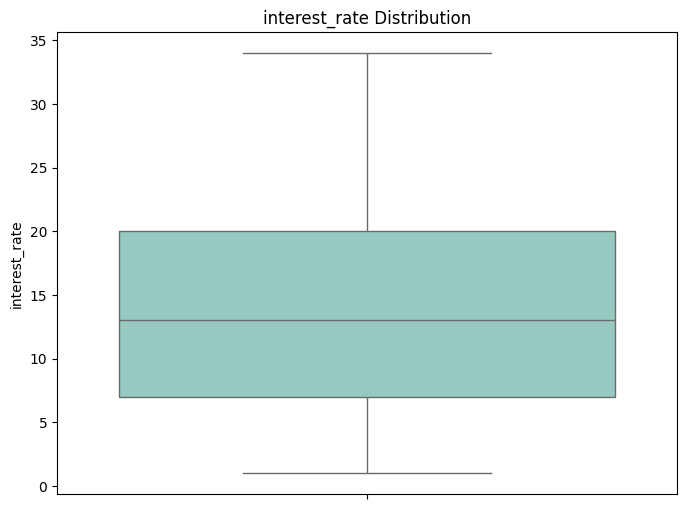

In [135]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y="interest_rate", palette="Set3")
plt.title("interest_rate Distribution")
plt.show()

## NUM_OF_LOAN

In [136]:
# Convert 'num_of_loan' column to numeric, coercing errors to NaN
# Select rows where 'num_of_loan' could not be converted to a valid number (NaN values)
# Display the first 20 rows of the 'num_of_loan' column with NaN values
df2[pd.to_numeric(df2["num_of_loan"], errors="coerce").isna()]["num_of_loan"].head(20)

,num_of_loan
37,0_
80,3_
84,3_
94,2_
119,5_
125,2_
131,0_
144,0_
158,5_
256,2_


In [137]:
# Strips the underscore character ("_") from the values in the 'num_of_loan' column
df2["num_of_loan"] = df2["num_of_loan"].str.strip("_")

<ipython-input-137-2565364137>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_of_loan"] = df2["num_of_loan"].str.strip("_")


In [138]:
# Converts the 'num_of_loan' column to numeric values, downcasting to integers for memory optimization
df2["num_of_loan"] = pd.to_numeric(df2["num_of_loan"], downcast="integer")

# Displays the data type of the 'num_of_loan' column after conversion
df2["num_of_loan"].dtype

<ipython-input-138-4178030911>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_of_loan"] = pd.to_numeric(df2["num_of_loan"], downcast="integer")


dtype('int16')

In [139]:
# Count unique values in 'num_of_loan', sort by value, and show the first 20
df2["num_of_loan"].value_counts().sort_index().head(20)

,count
num_of_loan,
-100,3876
0,10930
1,10606
2,15032
3,15104
4,14743
5,7197
6,7803
7,7344


In [140]:
# Marks invalid values in 'num_of_loan' (values < 0 or > 9) as NaN
df2.loc[(df2["num_of_loan"] < 0) | (df2["num_of_loan"] > 9), "num_of_loan"] = pd.NA

# Fills missing values in 'num_of_loan' within each 'customer_id' group using forward and backward fill methods
df2["num_of_loan"] = df2.groupby("customer_id")["num_of_loan"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Counts the number of remaining NaN values in the 'num_of_loan' column
df2["num_of_loan"].isna().sum()

<ipython-input-140-1119825236>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_of_loan"] = df2.groupby("customer_id")["num_of_loan"].transform(


np.int64(0)

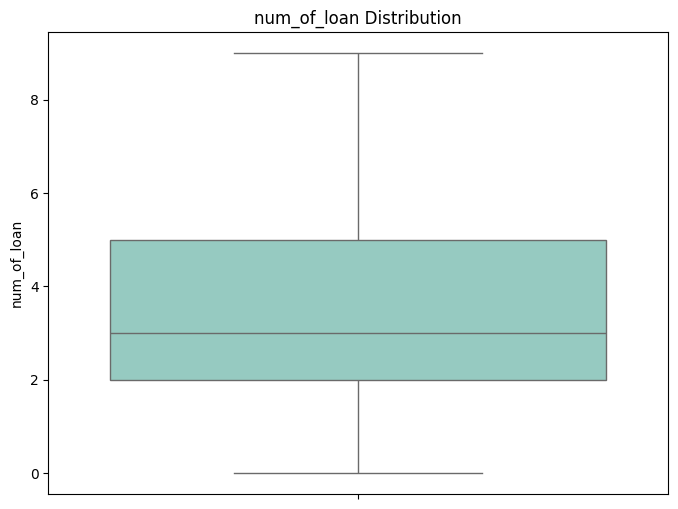

In [141]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y="num_of_loan", palette="Set3")
plt.title("num_of_loan Distribution")
plt.show()

## TYPE_OF_LOAN

In [142]:
# Groups the data by 'customer_id', counts the occurrences of each 'type_of_loan' for each customer,
# and then randomly samples 20 rows from the result
df2.groupby("customer_id")["type_of_loan"].value_counts().sample(10)

,,count
customer_id,type_of_loan,
CUS_0x41b3,Debt Consolidation Loan,8
CUS_0x7d80,"Debt Consolidation Loan, Auto Loan, and Home Equity Loan",8
CUS_0x45bd,"Home Equity Loan, Credit-Builder Loan, and Debt Consolidation Loan",8
CUS_0x55f5,"Not Specified, Home Equity Loan, Student Loan, Mortgage Loan, Debt Consolidation Loan, Personal Loan, and Debt Consolidation Loan",8
CUS_0xc075,"Credit-Builder Loan, Home Equity Loan, Credit-Builder Loan, Credit-Builder Loan, and Home Equity Loan",8
CUS_0xb4ca,"Debt Consolidation Loan, Auto Loan, Student Loan, Mortgage Loan, Personal Loan, Debt Consolidation Loan, and Payday Loan",8
CUS_0x6c67,"Auto Loan, and Credit-Builder Loan",8
CUS_0x33b0,Mortgage Loan,8
CUS_0xa294,"Home Equity Loan, Credit-Builder Loan, and Student Loan",8


In [152]:
# Groups the data by 'customer_id' and 'type_of_loan', counts the occurrences of each loan type per customer,
# then counts how many times each unique count of loan types appears across customers.
df2.groupby("customer_id")["type_of_loan"].value_counts().value_counts()

,count
count,
8,11074


 - Each **customer_id** should have **12,500** entries. Since there are missing values, we will fill in these missing entries appropriately to ensure the dataset is complete and consistent.

In [150]:
# Counts the number of customers where the 'type_of_loan' is missing (NaN).
df2[df2["type_of_loan"].isna()]["customer_id"].count()

np.int64(11408)

In [156]:
(df2["num_of_loan"] == 0).sum()

np.int64(11408)

In [157]:
# Updates the 'type_of_loan' column to "No Loan" for customers who have 0 loans.
df2.loc[df2["num_of_loan"] == 0, "type_of_loan"] = "No Loan"

- If an individual has no loans (**num_of_loan = 0**), explicitly marking this as **"No Loan"** enhances clarity during data analysis and ensures the information is easily understood.

In [158]:
df2["type_of_loan"].isna().sum()

np.int64(0)

In [159]:
# Removes the string " and" from the 'type_of_loan' column without using regular expressions.
df2["type_of_loan"] = df2["type_of_loan"].str.replace(" and", "", regex=False)

# Splits the 'type_of_loan' column by ", " to create a list of loan types for each row.
df2["type_of_loan"] = df2["type_of_loan"].str.split(", ")

<ipython-input-159-1899216096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["type_of_loan"] = df2["type_of_loan"].str.replace(" and", "", regex=False)
<ipython-input-159-1899216096>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["type_of_loan"] = df2["type_of_loan"].str.split(", ")


- To improve the clarity and observation during data counting, we remove the **And** expression and use commas for counting. This allows for better separation and easier analysis of the data.

In [160]:
df2["type_of_loan"].value_counts().sample(10)

,count
type_of_loan,
"[Mortgage Loan, Home Equity Loan, Auto Loan, Auto Loan, Home Equity Loan, Not Specified, Personal Loan]",8
"[Not Specified, Auto Loan, Home Equity Loan, Payday Loan, Personal Loan, Not Specified, Debt Consolidation Loan]",8
"[Student Loan, Home Equity Loan, Mortgage Loan]",24
"[Personal Loan, Credit-Builder Loan, Home Equity Loan, Student Loan, Credit-Builder Loan, Debt Consolidation Loan]",8
"[Student Loan, Credit-Builder Loan, Debt Consolidation Loan]",32
"[Payday Loan, Auto Loan, Student Loan, Not Specified]",8
"[Auto Loan, Not Specified, Student Loan, Mortgage Loan]",8
"[Personal Loan, Payday Loan, Student Loan, Not Specified, Not Specified]",8
"[Payday Loan, Not Specified, Debt Consolidation Loan, Not Specified, Student Loan, Auto Loan]",8


In [161]:
# Examining unique loan types

unique_loans = set()  # Initialize an empty set to store unique loan types.

# Iterate through each row in the 'type_of_loan' column.
for loans in df2["type_of_loan"]:

    # Iterate through each loan type in the list.
    for loan in loans:

        # Split each loan by comma and remove any extra spaces using strip().
        loan_items = [item.strip() for item in loan.split(",")]

        # Add each unique loan item to the set.
        unique_loans.update(loan_items)

# Sort the unique loan types in alphabetical order.
unique_loans = sorted(unique_loans)

# Display the sorted unique loan types.
unique_loans

['Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'No Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan']

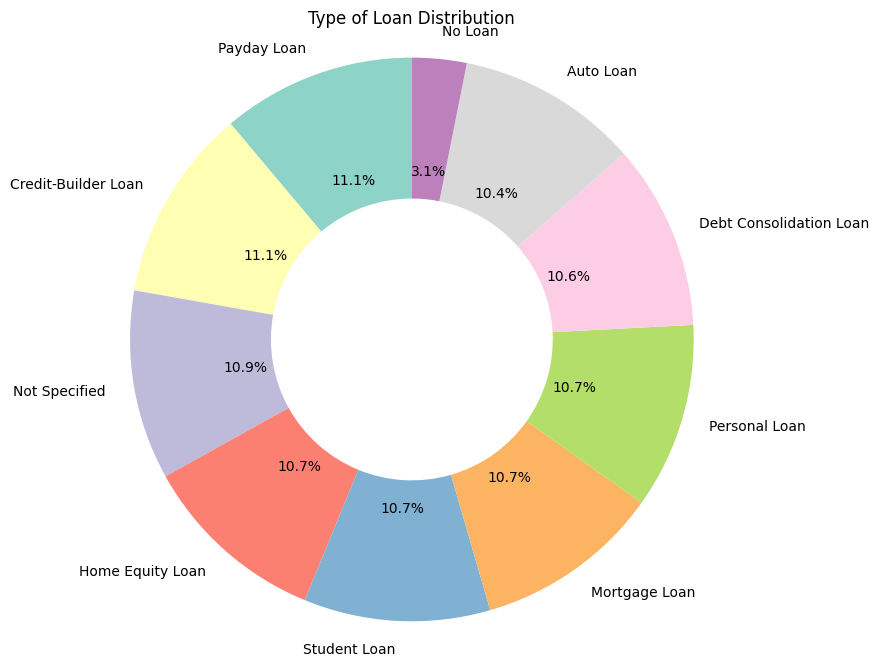

In [162]:
# Count the occurrences of each loan type
loan_counts = df2["type_of_loan"].explode().value_counts()

# Plot the pie chart for 'type_of_loan' distribution
plt.figure(figsize=(8, 8))
plt.pie(loan_counts,
        labels=loan_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("Type of Loan Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

## DELAY_FROM_DUE_DATE

In [166]:
# Count the frequency of each unique value in 'delay_from_due_date' column
# Sort the counts by the unique values (index) and display the first 10
df2.delay_from_due_date.value_counts().sort_index().head(10)

,count
delay_from_due_date,
-5,33
-4,62
-3,118
-2,168
-1,210
0,1195
1,1326
2,1342
3,1686


In [164]:
# Group by 'customer_id', count the occurrences of each 'delay_from_due_date' value,
df2.groupby(["customer_id"])["delay_from_due_date"].value_counts().sample(20)

,,count
customer_id,delay_from_due_date,
CUS_0x376a,14,1
CUS_0x1a5c,31,1
CUS_0x1236,4,7
CUS_0x448c,29,6
CUS_0x79d9,50,1
CUS_0x2bb5,32,1
CUS_0x9886,6,1
CUS_0x6410,21,7
CUS_0x7955,17,1


- Based on our observations, we need to correct the **negative values** and **outliers** to ensure the data is accurate and consistent.

In [ ]:
# Converts negative values in the 'delay_from_due_date' column to positive by applying the absolute value function
df2["delay_from_due_date"] = df2["delay_from_due_date"].abs()

In [167]:
# Counts the occurrences of each unique value in the 'delay_from_due_date' column, sorts them by index,
# and displays the first 10 entries
df2["delay_from_due_date"].value_counts().sort_index().head(10)

,count
delay_from_due_date,
-5,33
-4,62
-3,118
-2,168
-1,210
0,1195
1,1326
2,1342
3,1686


In [168]:
# Verification of inaccurate data, checking if there is a difference larger than 30
# between consecutive values in the 'delay_from_due_date' column for each customer
def check_consecutive_delays(group):
    delays = group["delay_from_due_date"].values
    # Calculate the consecutive differences
    diff = abs(delays[1:] - delays[:-1])
    # Check if the absolute difference between consecutive delays is greater than 30
    return (diff > 30).any()


In [169]:
# Group by 'customer_id' and apply the function to check for large consecutive differences
df2.groupby("customer_id").apply(check_consecutive_delays) == True

<ipython-input-169-947005453>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2.groupby("customer_id").apply(check_consecutive_delays) == True


,0
customer_id,
CUS_0x1000,False
CUS_0x1009,False
CUS_0x100b,False
CUS_0x1011,False
CUS_0x1013,False
...,...
CUS_0xff3,False
CUS_0xff4,False
CUS_0xff6,False


- This script defines the check_consecutive_delays function that checks for significant discrepancies between consecutive values in the delay_from_due_date column for each customer. The function iterates over the delay values for each customer and calculates the absolute difference between consecutive delays. If the difference is greater than 30 days, it returns True, indicating a problem with the data. The script then groups the dataset by customer_id and applies this function to each group. Finally, it checks if any group (customer) has a delay difference greater than 30 and returns a boolean result and as you can see in the result, there are 12500 false positives, indicating that the function is working properly.

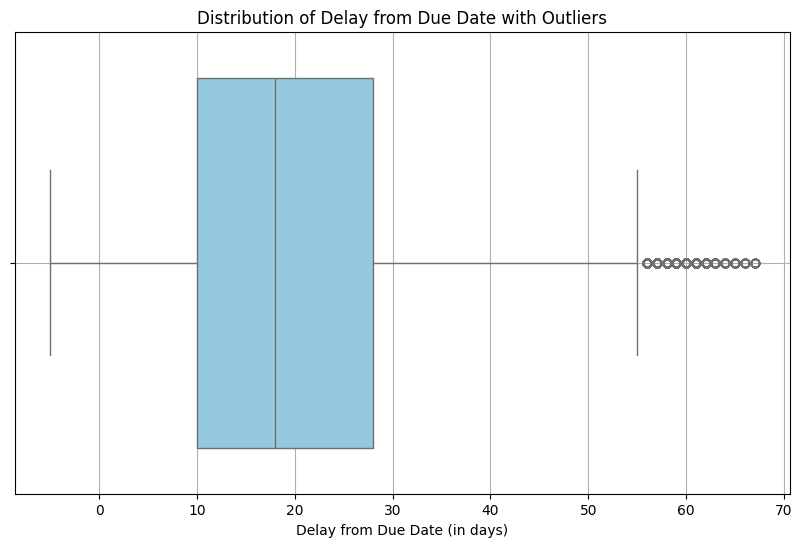

In [171]:
# Box plot for delay_from_due_date
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2["delay_from_due_date"], color='skyblue')
plt.title("Distribution of Delay from Due Date with Outliers")
plt.xlabel("Delay from Due Date (in days)")
plt.grid(True)
plt.show()

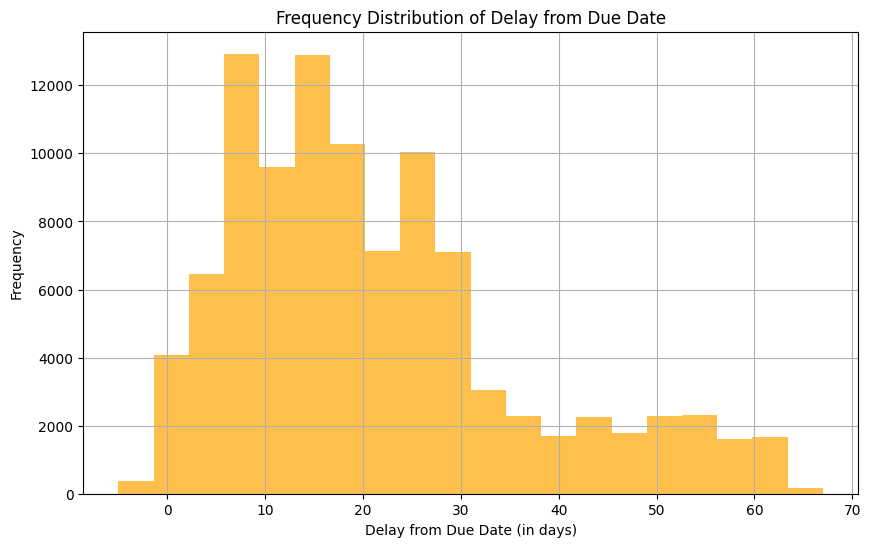

In [172]:
# Histogram for delay_from_due_date
plt.figure(figsize=(10, 6))
plt.hist(df2["delay_from_due_date"], bins=20, color='orange', alpha=0.7)
plt.title("Frequency Distribution of Delay from Due Date")
plt.xlabel("Delay from Due Date (in days)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## NUM_OF_DELAYED_PAYMENT

In [173]:
# Checking for rows where 'num_of_delayed_payment' cannot be converted to numeric
df2[pd.to_numeric(df2["num_of_delayed_payment"],
                  errors="coerce").isna()]["num_of_delayed_payment"].head(50)

,num_of_delayed_payment
1,NaN
4,NaN
6,8_
11,3_
30,NaN
32,NaN
33,NaN
53,3_
54,2_
70,NaN


In [174]:
# Stripping underscores from 'num_of_delayed_payment' values
df2["num_of_delayed_payment"] = df2["num_of_delayed_payment"].str.strip("_")

# Converting 'num_of_delayed_payment' to numeric values, downcasting to integer type
df2["num_of_delayed_payment"] = pd.to_numeric(df2["num_of_delayed_payment"],
                                              downcast="integer")

# Checking the data type of 'num_of_delayed_payment' column
df2["num_of_delayed_payment"].dtype

<ipython-input-174-3801831300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_of_delayed_payment"] = df2["num_of_delayed_payment"].str.strip("_")
<ipython-input-174-3801831300>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_of_delayed_payment"] = pd.to_numeric(df2["num_of_delayed_payment"],


dtype('float64')

In [175]:
# Counting the number of missing ('NaN') values in 'num_of_delayed_payment' for each 'customer_id'
df2[df2["num_of_delayed_payment"].isna()].groupby("customer_id").size()

,0
customer_id,
CUS_0x1011,2
CUS_0x1013,1
CUS_0x1018,1
CUS_0x102d,1
CUS_0x102e,1
...,...
CUS_0xfdd,1
CUS_0xfe3,3
CUS_0xfe4,2


In [176]:
# Counting the frequency of each unique value in 'num_of_delayed_payment' and sorting by index
df2["num_of_delayed_payment"].value_counts().sort_index().head(50)

,count
num_of_delayed_payment,
-3.0,94
-2.0,234
-1.0,316
0.0,1609
1.0,1636
2.0,1810
3.0,1931
4.0,1838
5.0,2091


In [177]:
# Handling out-of-range values for 'num_of_delayed_payment'
df2.loc[(df2["num_of_delayed_payment"] < 0) | (df2["num_of_delayed_payment"] > 28), "num_of_delayed_payment"] = np.nan

# Filling missing values (NaN) within each 'customer_id' group using forward and backward fill
df2["num_of_delayed_payment"] = df2.groupby("customer_id")["num_of_delayed_payment"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Checking the total number of missing values after filling
df2["num_of_delayed_payment"].isna().sum()

<ipython-input-177-2086566288>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_of_delayed_payment"] = df2.groupby("customer_id")["num_of_delayed_payment"].transform(


np.int64(0)

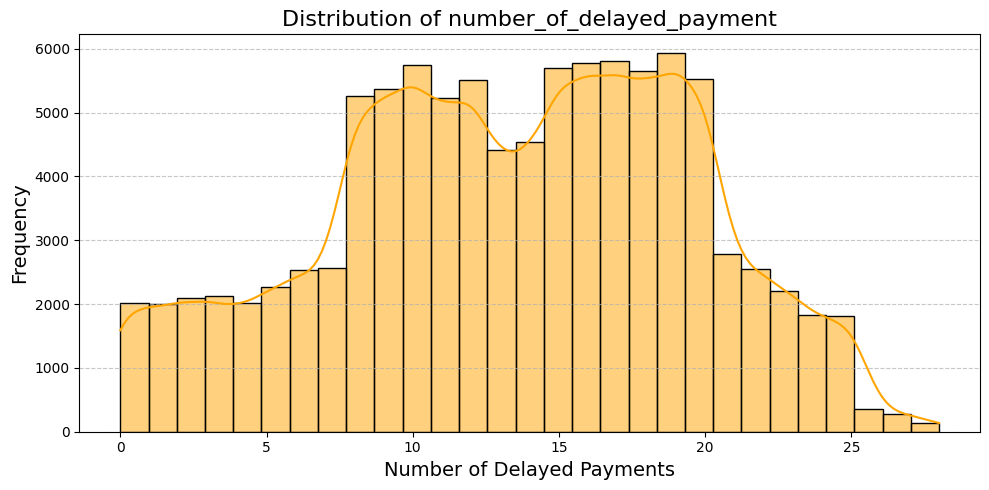

In [178]:
# Histogram for num_of_delayed_payment
plt.figure(figsize=(10, 5))
sns.histplot(data=df2, x="num_of_delayed_payment", bins=29, kde=True, color='orange')

plt.title('Distribution of number_of_delayed_payment', fontsize=16)
plt.xlabel('Number of Delayed Payments', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## CHANGE_CREDİT_LIMIT

In [179]:
# Checking for rows where 'changed_credit_limit' cannot be converted to numeric
df2[pd.to_numeric(df2["changed_credit_limit"],
                  errors="coerce").isna()]["changed_credit_limit"].sample(20)

,changed_credit_limit
30489,_
2581,_
76480,_
35361,_
21887,_
99462,_
1494,_
2406,_
56556,_
84253,_


In [180]:
# Replacing "_" values in 'changed_credit_limit' with NaN
df2.loc[(df2["changed_credit_limit"] == "_"), "changed_credit_limit"] = np.nan

# Filling missing values (NaN) within each 'customer_id' group using forward and backward fill
df2["changed_credit_limit"] = df2.groupby("customer_id")["changed_credit_limit"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Checking the total number of missing values after filling
df2["changed_credit_limit"].isna().sum()

<ipython-input-180-2093550854>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["changed_credit_limit"] = df2.groupby("customer_id")["changed_credit_limit"].transform(


np.int64(0)

In [181]:
# Convert 'changed_credit_limit' to numeric values (float), downcast to save memory, and round to 3 decimal places
df2["changed_credit_limit"] = pd.to_numeric(df2["changed_credit_limit"],
                                            downcast="float").round(3)

# Check the data type of the 'changed_credit_limit' column after conversion
df2["changed_credit_limit"].dtype
# because it needs to be converted to float value after doing operations as limit object.

<ipython-input-181-31616839>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["changed_credit_limit"] = pd.to_numeric(df2["changed_credit_limit"],


dtype('float32')

In [182]:
# Get the value counts of 'changed_credit_limit', sorted by index, and display the first 20
df2["changed_credit_limit"].value_counts().sort_index().head(20)

,count
changed_credit_limit,
-6.49,1
-6.48,1
-6.45,1
-6.44,2
-6.43,2
-6.39,1
-6.37,1
-6.35,2
-6.33,1


In [183]:
# Convert all values in 'changed_credit_limit' to their absolute values
df2["changed_credit_limit"] = df2["changed_credit_limit"].abs()

<ipython-input-183-3931560220>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["changed_credit_limit"] = df2["changed_credit_limit"].abs()


## NUM_CREDIT_INQUIRIES

In [184]:
# Group by 'customer_id' and get unique values in the 'num_credit_inquiries' column for each customer
df2.groupby("customer_id")["num_credit_inquiries"].unique()

,num_credit_inquiries
customer_id,
CUS_0x1000,"[10.0, 11.0]"
CUS_0x1009,"[2.0, 4.0]"
CUS_0x100b,"[1.0, 2271.0, 4.0]"
CUS_0x1011,"[7.0, 1965.0]"
CUS_0x1013,[3.0]
...,...
CUS_0xff3,"[3.0, 5.0]"
CUS_0xff4,"[5.0, nan]"
CUS_0xff6,"[nan, 2.0]"


In [185]:
# Get the value counts of 'num_credit_inquiries', including NaN values, and display the top 30
df2["num_credit_inquiries"].value_counts(dropna=False).head(30)

,count
num_credit_inquiries,
4.0,11271
3.0,8890
6.0,8111
7.0,8058
2.0,8028
8.0,7866
1.0,7588
0.0,6972
5.0,5693


In [188]:
# Set 'num_credit_inquiries' greater than 17 to NaN
df2.loc[(df2["num_credit_inquiries"] > 17), "num_credit_inquiries"] = pd.NA

# Fill NaN values using forward fill and backward fill within each customer_id group
df2["num_credit_inquiries"] = df2.groupby("customer_id")["num_credit_inquiries"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Check how many NaN values are left in 'num_credit_inquiries'
df2["num_credit_inquiries"].isna().sum()

<ipython-input-188-2046192273>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_credit_inquiries"] = df2.groupby("customer_id")["num_credit_inquiries"].transform(


np.int64(0)

- Here, we observe outliers after **17**, so we will clean these values to maintain consistency and accuracy in the data.

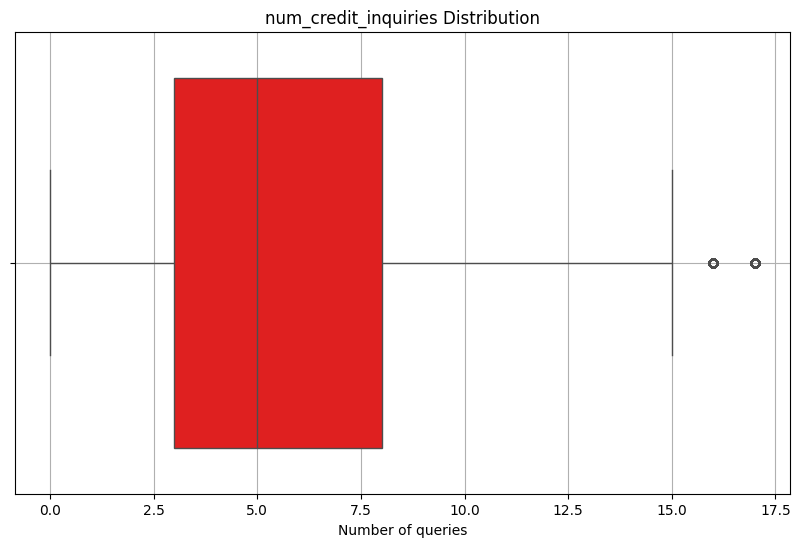

In [189]:
# Box plot for delay_from_due_date
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2["num_credit_inquiries"], color='red')
plt.title("num_credit_inquiries Distribution")
plt.xlabel("Number of queries")
plt.grid(True)
plt.show()

## CREDIT_MIX

In [335]:
df2.credit_mix.value_counts()

,count
credit_mix,
Standard,45848
Good,30384
Bad,23768


In [192]:
# Group by customer_id and count unique values in credit_mix, then display the first 20
df2.groupby(["customer_id"])["credit_mix"].value_counts().head(20)

customer_id  credit_mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
             _             3
CUS_0x100b   Good          7
             _             1
CUS_0x1011   Standard      8
CUS_0x1013   Good          7
             _             1
CUS_0x1015   Standard      8
CUS_0x1018   Bad           6
             _             2
CUS_0x1026   Good          6
             _             2
CUS_0x102d   Good          7
             _             1
CUS_0x102e   Standard      6
             _             2
CUS_0x1032   Standard      8
CUS_0x1037   Good          7
             _             1
Name: count, dtype: int64

In [193]:
# Count how many customer_ids have exactly 3 unique credit_mix values
(df2.groupby(["customer_id"])["credit_mix"].nunique() == 3).sum()

np.int64(0)

In [194]:
# Replace "_" values in 'credit_mix' with NaN
df2.loc[df2["credit_mix"] == "_", "credit_mix"] = pd.NA

# Fill NaN values in 'credit_mix' for each customer with the most frequent value (mode)
df2["credit_mix"] = df2.groupby("customer_id")["credit_mix"].transform(
    lambda x: x.fillna(x.mode()[0]))

# Check the number of remaining NaN values in 'credit_mix'
df2["credit_mix"].isna().sum()

<ipython-input-194-3429419070>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["credit_mix"] = df2.groupby("customer_id")["credit_mix"].transform(


np.int64(0)

In [320]:
df2["credit_mix"].isna().sum()

np.int64(0)

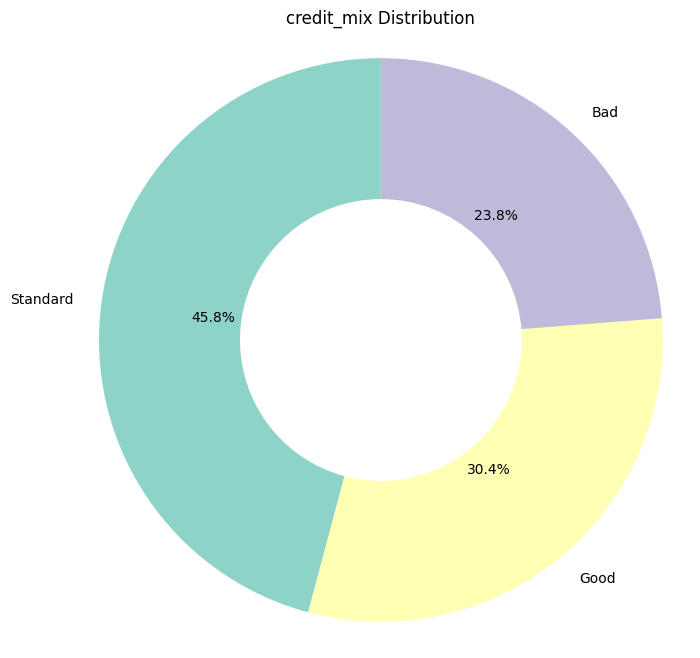

In [195]:
plt.figure(figsize=(8, 8))
plt.pie(df2["credit_mix"].value_counts(),
        labels=df2["credit_mix"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("credit_mix Distribution")
plt.axis('equal')
plt.show()

## OUTSTANDING_DEBT

In [196]:
df2.outstanding_debt.value_counts().sample(20)

,count
outstanding_debt,
2484.72,8
858.33,8
2255.57_,1
1340.52_,1
4738.39,8
854.1,8
883.38,8
2465.73,8
2932.27,8


In [197]:
# Identify rows where 'outstanding_debt' cannot be converted to numeric, and display the first 20
df2[pd.to_numeric(df2["outstanding_debt"], errors="coerce").isna()]["outstanding_debt"].head(20)

,outstanding_debt
87,1328.93_
142,1283.37_
368,2797.17_
632,3818.57_
703,343.84_
731,363.51_
782,404.51_
819,1755.81_
835,2593.44_
992,89.62_


In [198]:
# Remove leading and trailing underscores from 'outstanding_debt' values
df2["outstanding_debt"] = df2["outstanding_debt"].str.strip("_")

# Convert 'outstanding_debt' to numeric values and downcast to float for memory optimization
df2["outstanding_debt"] = pd.to_numeric(df2["outstanding_debt"], downcast="float")

# Check the data type of 'outstanding_debt' column
df2["outstanding_debt"].dtype

<ipython-input-198-2444587421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["outstanding_debt"] = df2["outstanding_debt"].str.strip("_")
<ipython-input-198-2444587421>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["outstanding_debt"] = pd.to_numeric(df2["outstanding_debt"], downcast="float")


dtype('float32')

In [199]:
# Count the unique values of 'outstanding_debt' and sort them in ascending order, then display the first 20 values
df2.outstanding_debt.value_counts().sort_index().head(20)

,count
outstanding_debt,
0.23,8
0.34,8
0.54,8
0.56,8
0.77,8
0.95,16
1.20,8
1.23,8
1.30,8


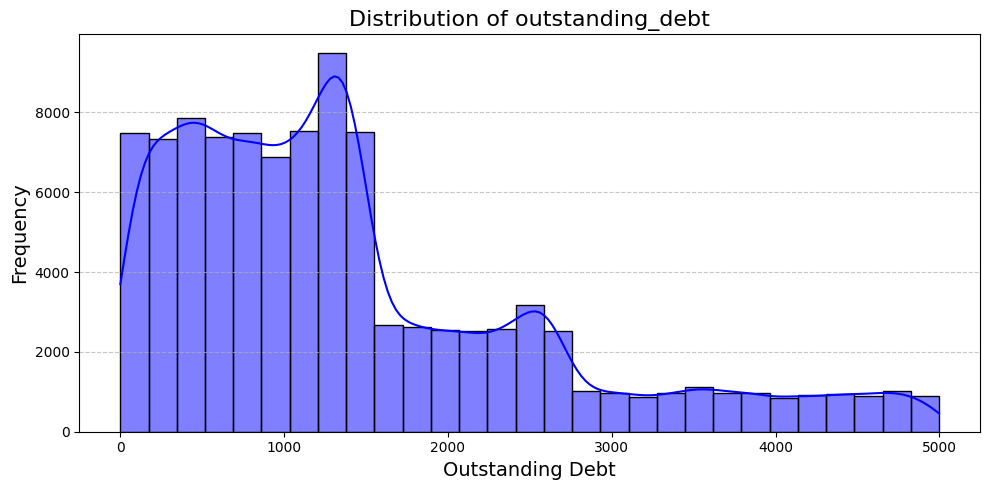

In [200]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df2, x="outstanding_debt", bins=29, kde=True, color='blue')

plt.title('Distribution of outstanding_debt', fontsize=16)
plt.xlabel('Outstanding Debt', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [201]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             100000 non-null  object 
 1   num_bank_accounts       100000 non-null  float64
 2   num_credit_card         100000 non-null  float64
 3   interest_rate           100000 non-null  float64
 4   num_of_loan             100000 non-null  float64
 5   type_of_loan            100000 non-null  object 
 6   delay_from_due_date     100000 non-null  int64  
 7   num_of_delayed_payment  100000 non-null  float64
 8   changed_credit_limit    100000 non-null  float32
 9   num_credit_inquiries    100000 non-null  float64
 10  credit_mix              100000 non-null  object 
 11  outstanding_debt        100000 non-null  float32
dtypes: float32(2), float64(6), int64(1), object(3)
memory usage: 8.4+ MB


- All the data in **Part 2** has been successfully filled without any data loss. As seen in the table, the number of rows in all columns should be 100,000, indicating that the data was properly handled and completed.

# PART 3

In [202]:
# Specify the columns to include in the analysis
columns_to_use = [
    "Customer_ID",
    "Credit_Utilization_Ratio",
    "Payment_of_Min_Amount",
    "Amount_invested_monthly",
    "Payment_Behaviour",
    "Monthly_Balance",
    "Credit_Score",
]
# Load the dataset, selecting only the specified columns
df3 = df[columns_to_use]
# Display the first five rows of the filtered datase
df3.head(10)

,Customer_ID,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,26.822620,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,31.944960,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,28.609352,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,31.377862,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,24.797347,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,CUS_0xd40,27.262259,No,62.430172331195294,!@9#%8,340.4792117872438,Good
6,CUS_0xd40,22.537593,No,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,CUS_0xd40,23.933795,No,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,CUS_0x21b1,24.464031,No,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,CUS_0x21b1,38.550848,No,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


Here is an overview of the dataset with comments on each column:

- **Credit_Utilization_Ratio**: This column indicates the ratio of credit utilized by the customer relative to their available credit. The values range between 22.5% and 38.5%. These values appear consistent, with no missing data. However, it's important to monitor for outliers or extreme values, as they can indicate unusual spending patterns.

- **Payment_of_Min_Amount**: This categorical column reflects whether the customer has paid the minimum required amount or not. All entries show "No," which seems consistent. However, further analysis could be done to determine if a change in this behavior is necessary or if it is a systematic issue in the dataset.

- **Amount_invested_monthly**: This numerical column shows how much the customer invests monthly. The values vary from approximately 24.79 to 199.46, which seems normal, with no missing values. It's important to check for outliers or unrealistic values (e.g., very low or very high investments).

- **Payment_Behaviour**: This categorical column reflects the type of payment behavior of the customer. There are several categories like "High_spent_Small_value_payments," "Low_spent_Large_value_payments," and "Low_spent_Medium_value_payments." One value, "!@9#%8," seems like a placeholder or erroneous data and should be corrected or removed.

- **Monthly_Balance**: This numerical column represents the customer's monthly balance. The values are positive and vary between 223.45 and 484.59, which seem reasonable. It's important to ensure no negative or unusually large values are present.

- **Credit_Score**: This categorical column indicates the customer's credit score, with two values: "Good" and "Standard." The credit score values seem consistent, though there might be other categories in the dataset not seen here, which should be checked for completeness.

In [203]:
# Convert column names to lowercase for consistency and ease of use
df3.columns = [column.lower() for column in df3.columns]

In [204]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               100000 non-null  object 
 1   credit_utilization_ratio  100000 non-null  float64
 2   payment_of_min_amount     100000 non-null  object 
 3   amount_invested_monthly   95521 non-null   object 
 4   payment_behaviour         100000 non-null  object 
 5   monthly_balance           98800 non-null   object 
 6   credit_score              100000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.3+ MB


## CREDIT_UTILIZATION_RATIO

In [205]:
# Count the occurrences of each unique value in 'credit_utilization_ratio' column, including NaN values,
# and then sort the result in ascending order by the index (the credit_utilization_ratio values).
df3.credit_utilization_ratio.value_counts(dropna=False).sort_index()

,count
credit_utilization_ratio,
20.000000,1
20.100770,1
20.172942,1
20.244130,1
20.257073,1
...,...
49.064277,1
49.254983,1
49.522324,1


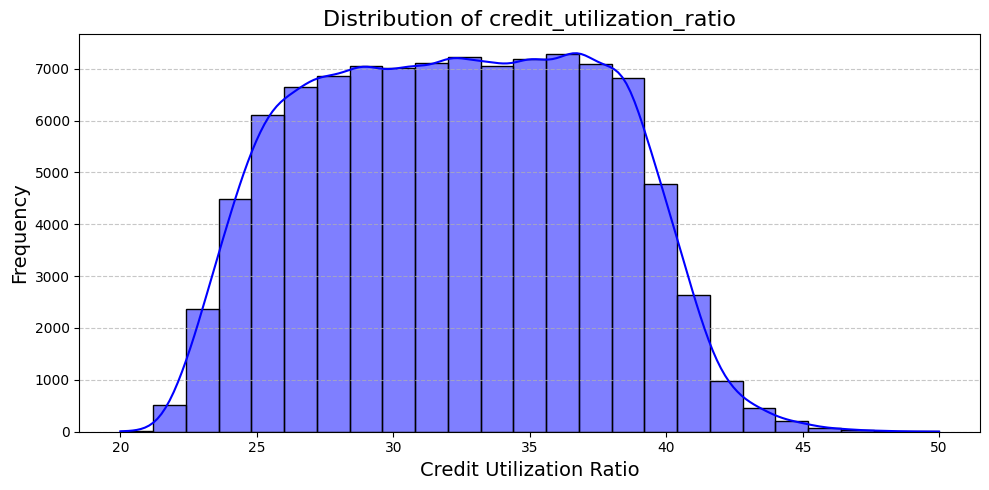

In [206]:
plt.figure(figsize=(10, 5))  # Set the figure size to 10x5 inches for the plot
sns.histplot(data=df3, x="credit_utilization_ratio", bins=25, kde=True, color='blue')
# Plot a histogram for the 'credit_utilization_ratio' column from df3, with 25 bins,
# adding a Kernel Density Estimate (KDE) curve on top for smoother visualization. The color is set to blue.

plt.title('Distribution of credit_utilization_ratio', fontsize=16)  # Add a title with a font size of 16
plt.xlabel('Credit Utilization Ratio', fontsize=14)  # Label for the x-axis with a font size of 14
plt.ylabel('Frequency', fontsize=14)  # Label for the y-axis with a font size of 14

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid on the y-axis with dashed lines, alpha (transparency) set to 0.7

plt.tight_layout()  # Automatically adjust the layout for better spacing
plt.show()  # Display the plot

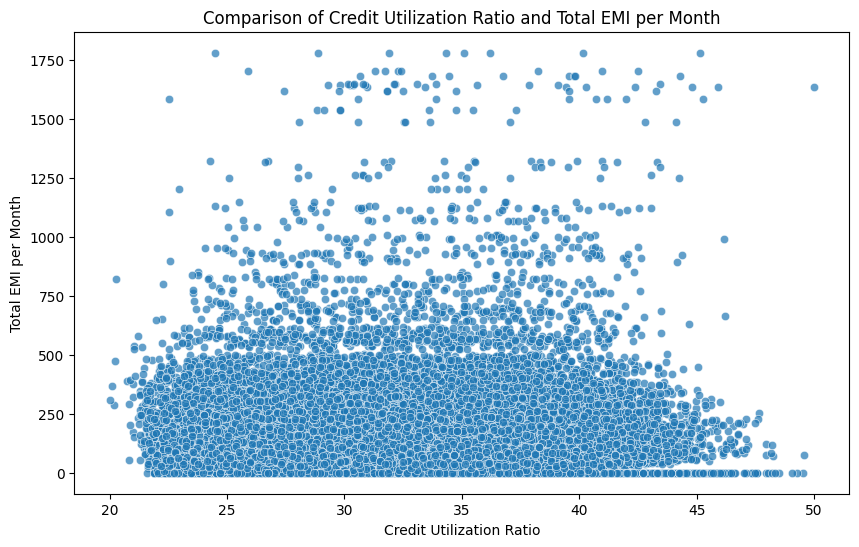

In [207]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Scatter plot to observe the relationship between credit_utilization_ratio and total_emi_per_month
sns.scatterplot(x=df3["credit_utilization_ratio"], y=df1["total_emi_per_month"], alpha=0.7)

# Adding titles and labels
plt.title("Comparison of Credit Utilization Ratio and Total EMI per Month")
plt.xlabel("Credit Utilization Ratio")
plt.ylabel("Total EMI per Month")

# Display the plot
plt.show()

- As seen in the graph, there are no outliers in the **Credit Utilization Ratio**. When compared with **Total EMI per Month**, the graph shows reasonable and consistent values, confirming the data's integrity.

## PAYMENT_OF_MIN_AMOUNT

In [208]:
# Count occurrences of each unique value in the 'payment_of_min_amount' column, including NaN values
df3.payment_of_min_amount.value_counts(dropna=False)

,count
payment_of_min_amount,
Yes,52326
No,35667
NM,12007


In [ ]:
# Grouping the data by 'customer_id' and counting occurrences of each unique value in the 'payment_of_min_amount' column
# including NaN values, for each customer
df3.groupby(["customer_id"]).payment_of_min_amount.value_counts(dropna=False)


In [209]:
# Grouping the data by 'customer_id' and counting occurrences of each unique value in the 'payment_of_min_amount' column
# including NaN values, for each customer
df3.groupby(["customer_id"]).payment_of_min_amount.value_counts(dropna=False)

customer_id  payment_of_min_amount
CUS_0x1000   Yes                      8
CUS_0x1009   Yes                      7
             NM                       1
CUS_0x100b   No                       7
             NM                       1
                                     ..
CUS_0xff4    Yes                      7
             NM                       1
CUS_0xff6    No                       8
CUS_0xffc    Yes                      8
CUS_0xffd    Yes                      8
Name: count, Length: 20509, dtype: int64

In [210]:
# Grouping the data by 'customer_id' and counting occurrences of each unique value in the 'payment_of_min_amount' column,
# then counting how many times each count appears across all customers
df3.groupby(["customer_id"]).payment_of_min_amount.value_counts(dropna=False).value_counts()

,count
count,
7,4906
1,4906
8,4491
6,2330
2,2330
5,675
3,675
4,196


In [211]:
# Check if any customer_id has all three unique values ('Yes', 'No', 'NM') in the 'payment_of_min_amount' column
(df3.groupby("customer_id")["payment_of_min_amount"].nunique() == 3).sum()

np.int64(0)

In [212]:
# Check if there is any customer_id where all values in 'payment_of_min_amount' are 'NM'
df3.groupby("customer_id")["payment_of_min_amount"].apply(
    lambda x: (x == "NM").all()).sum()

np.int64(0)

In [213]:
# If there is an "NM" value, fill it with another value from the same customer group
df3["payment_of_min_amount"] = df3.groupby(
    "customer_id")["payment_of_min_amount"].transform(
        lambda x: x.replace("NM", x[x != "NM"].iloc[0]))

<ipython-input-213-2201433614>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["payment_of_min_amount"] = df3.groupby(


In [214]:
df3.payment_of_min_amount.value_counts(dropna=False)

,count
payment_of_min_amount,
Yes,59432
No,40568


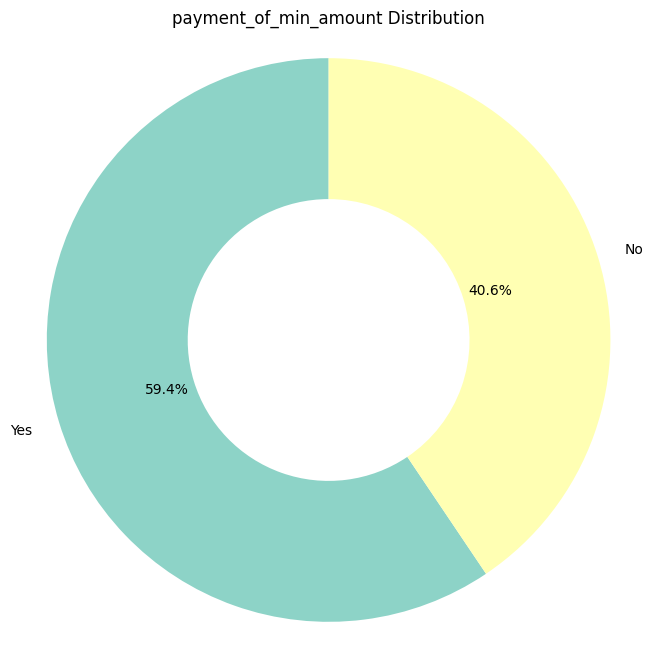

In [215]:
plt.figure(figsize=(8, 8))
plt.pie(df3["payment_of_min_amount"].value_counts(),
        labels=df3["payment_of_min_amount"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("payment_of_min_amount Distribution")
plt.axis('equal')
plt.show()

## AMOUNT_INVESTED_MONTHLY

In [239]:
# df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [253]:
# df3["amount_invested_monthly"].isna().sum()

np.int64(4479)

In [251]:
# df3["amount_invested_monthly"] = df["Amount_invested_monthly"]

<ipython-input-251-3482795589>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["amount_invested_monthly"] = df["Amount_invested_monthly"]


In [241]:
# Attempt to convert the 'amount_invested_monthly' column to numeric,
# any non-numeric values will be turned into NaN due to 'errors="coerce"'
df3[pd.to_numeric(df3["amount_invested_monthly"], errors="coerce").isna()]["amount_invested_monthly"].value_counts(dropna=False)

,count
amount_invested_monthly,
NaN,4479
__10000__,4305


In [254]:
# Remove any leading or trailing underscores ("_") from the 'amount_invested_monthly' column
df3["amount_invested_monthly"] = df3["amount_invested_monthly"].str.strip("_")

# Convert the 'amount_invested_monthly' column to numeric (float) values,
# downcast to a more memory-efficient float type if possible
df3["amount_invested_monthly"] = pd.to_numeric(df3["amount_invested_monthly"],
                                               downcast="float")

# Check the data type of the 'amount_invested_monthly' column after conversion
df3["amount_invested_monthly"].dtype

<ipython-input-254-751075613>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["amount_invested_monthly"] = df3["amount_invested_monthly"].str.strip("_")
<ipython-input-254-751075613>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["amount_invested_monthly"] = pd.to_numeric(df3["amount_invested_monthly"],


dtype('float32')

<Axes: >

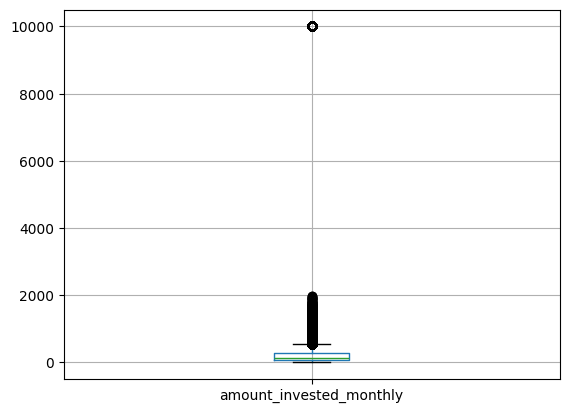

In [255]:
# df3.boxplot(column="amount_invested_monthly")
#

In [261]:
# Step 1: Get customer_ids who have invested exactly 10000 at least once
customer_with_10000 = df3.loc[df3["amount_invested_monthly"] == 10000, "customer_id"].unique()

# Step 2: Filter the entire dataset to only include those customers
df_filtered = df3[df3["customer_id"].isin(customer_with_10000)]

# Step 3: Group by 'customer_id' and 'amount_invested_monthly', and count occurrences
result = (
    df_filtered.groupby(["customer_id", "amount_invested_monthly"])
    .size()
    .to_frame(name="count")
)

print(result.head(50))

                                     count
customer_id amount_invested_monthly       
CUS_0x100b  174.287598                   1
            397.241852                   1
            424.003204                   1
            617.079285                   1
            661.624023                   1
            758.083191                   1
            10000.000000                 1
CUS_0x1011  71.226166                    1
            74.567383                    1
            119.853088                   1
            383.350830                   1
            444.197815                   1
            523.234009                   1
            560.997070                   1
            10000.000000                 1
CUS_0x1041  12.035500                    1
            19.626997                    1
            29.743185                    1
            37.888050                    1
            42.757725                    1
            43.565857                    1
           

In [262]:
# Check if all values in 'amount_invested_monthly' are NaN for each 'customer_id'
df3.groupby("customer_id")["amount_invested_monthly"].apply(
    lambda x: x.isna().all()).sum()

np.int64(0)

- In all **customer_id** groups, no group in the **amount_invested_monthly** column consists entirely of missing (NaN) values. This ensures that there is some data available for every group, and no group is entirely incomplete in this specific column.

In [264]:
# Replace "_" values in 'credit_mix' with NaN
df3.loc[df3["amount_invested_monthly"] == 10000, "amount_invested_monthly"] = pd.NA

# Fill NaN values in 'credit_mix' for each customer with the most frequent value (mode)
df3["amount_invested_monthly"] = df3.groupby("customer_id")["amount_invested_monthly"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Check the number of remaining NaN values in 'credit_mix'
df3["amount_invested_monthly"].isna().sum()

<ipython-input-264-170167816>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["amount_invested_monthly"] = df3.groupby("customer_id")["amount_invested_monthly"].transform(


np.int64(0)

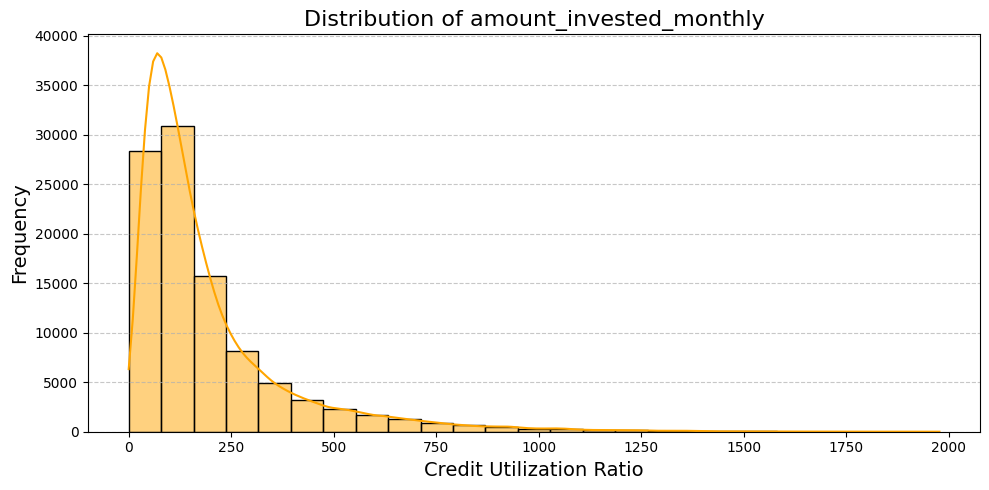

In [265]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df3, x="amount_invested_monthly", bins=25, kde=True, color='orange')

plt.title('Distribution of amount_invested_monthly', fontsize=16)
plt.xlabel('Credit Utilization Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## PAYMENT_BEHAVIOUR

In [266]:
# Count the occurrences of each unique value in the 'payment_behaviour' column, including NaN values
df3.payment_behaviour.value_counts(dropna=False)

,count
payment_behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
!@9#%8,7600


In [268]:
# Group the DataFrame by 'customer_id', then calculate the number of unique values in the 'payment_behaviour' column for each customer
df3.groupby(["customer_id"])["payment_behaviour"].nunique().head(10)

,payment_behaviour
customer_id,


In [269]:
# Group the DataFrame by 'customer_id', calculate the number of unique values in 'payment_behaviour' for each customer,
# and then count how many customers have the same number of unique payment behaviors.
df3.groupby(["customer_id"])["payment_behaviour"].nunique().value_counts()

,count
payment_behaviour,
5,4448
4,4426
3,1632
6,1616
2,220
7,148
1,10


**Most Customers Have 4 or 5 Unique Behaviors:**

Most customers (4448 and 4426 customers) have 4 or 5 different **payment_behaviour** values. This indicates that these customers exhibit a variety of payment behaviors.

**Customers with Fewer Unique Behaviors:**

Customers with 3, 6, 2, 7, and 1 unique values are less common. This suggests that these customers may have more limited or consistent payment behaviors.

**Customers with Only 1 Unique Behavior:**

The 10 customers with only 1 unique behavior may demonstrate very little diversity in their payment patterns, possibly indicating that they exhibit just one payment behavior.

**Differences in Customer Payment Behaviors:**

The high number of customers with 5 and 4 unique behaviors suggests that, generally, there is diversity in payment behaviors. This could indicate that customers show different payment habits at different times or experience changes in their payment behavior.

**Customers with Limited Unique Behaviors:**

With only 1 unique **payment_behaviour** value, the very few (10 people) may have very stable payment habits, showing little to no variation.

This analysis is helpful for understanding the diversity in customer payment habits and could be important for assessing financial risk or managing customer relationships.

In [270]:
# Replace the invalid payment_behaviour value "!@9#%8" with NaN (missing value)
df3.loc[(df3["payment_behaviour"] == "!@9#%8"), "payment_behaviour"] = np.nan

# Fill the missing 'payment_behaviour' values within each 'customer_id' group using forward-fill (ffill) and backward-fill (bfill)
df3["payment_behaviour"] = df3.groupby("customer_id")["payment_behaviour"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Check how many missing values are left in the 'payment_behaviour' column
df3["payment_behaviour"].isna().sum()

<ipython-input-270-1897852092>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["payment_behaviour"] = df3.groupby("customer_id")["payment_behaviour"].transform(


np.int64(0)

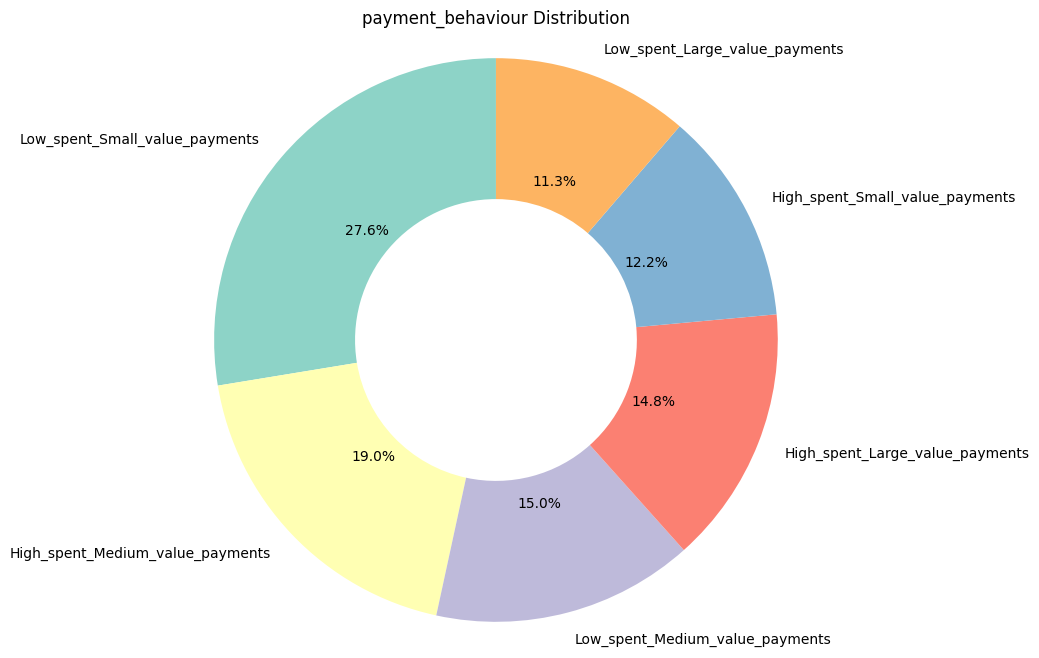

In [271]:
plt.figure(figsize=(8, 8))
plt.pie(df3["payment_behaviour"].value_counts(),
        labels=df3["payment_behaviour"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("payment_behaviour Distribution")
plt.axis('equal')
plt.show()

## MONTHLY_BALANCE

In [272]:
# Count the occurrences of each unique value in the 'monthly_balance' column, including NaN values
df3.monthly_balance.value_counts(dropna=False)

,count
monthly_balance,
NaN,1200
__-333333333333333333333333333__,9
254.9709216273975,1
250.0931678204641,1
289.7550752754317,1
...,...
278.8720257394474,1
376.7024623690405,1
321.2336043357731,1


In [273]:
# Check which rows in the "monthly_balance" column cannot be converted to numeric values and count them
df3[pd.to_numeric(
    df3["monthly_balance"],
    errors="coerce").isna()]["monthly_balance"].value_counts(dropna=False)

,count
monthly_balance,
NaN,1200
__-333333333333333333333333333__,9


In [274]:
# Apply a lambda function to each element in the 'monthly_balance' column
df3["monthly_balance"] = df3["monthly_balance"].replace('__-333333333333333333333333333__', np.nan)

<ipython-input-274-1604986089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["monthly_balance"] = df3["monthly_balance"].replace('__-333333333333333333333333333__', np.nan)


In [279]:
# Convert the 'monthly_balance' column to a float data type
df3["monthly_balance"] = df3["monthly_balance"].astype('float')

# Check the data type of the 'monthly_balance' column after conversion
df3["monthly_balance"].dtype

# Set pandas to display numbers in full without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Get the top 20 largest values in the 'monthly_balance' column
# df3["monthly_balance"].nlargest(20)

<ipython-input-279-992039388>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["monthly_balance"] = df3["monthly_balance"].astype('float')


,monthly_balance
9376,1602.04
7475,1576.29
33072,1567.21
17029,1566.61
15878,1564.13
34161,1558.42
33076,1555.20
68000,1552.95
96432,1546.32
62954,1542.27


In [277]:
# Count the number of customer_id groups where all monthly_balance values are NaN
df3.groupby("customer_id")["monthly_balance"].apply(
    lambda x: x.isna().all()).sum()

np.int64(0)

In [290]:
# Fill missing 'monthly_balance' values with the mean of each 'customer_id' group
df3["monthly_balance"] = df3.groupby("customer_id")["monthly_balance"].transform(lambda x: x.fillna(x.mean()))

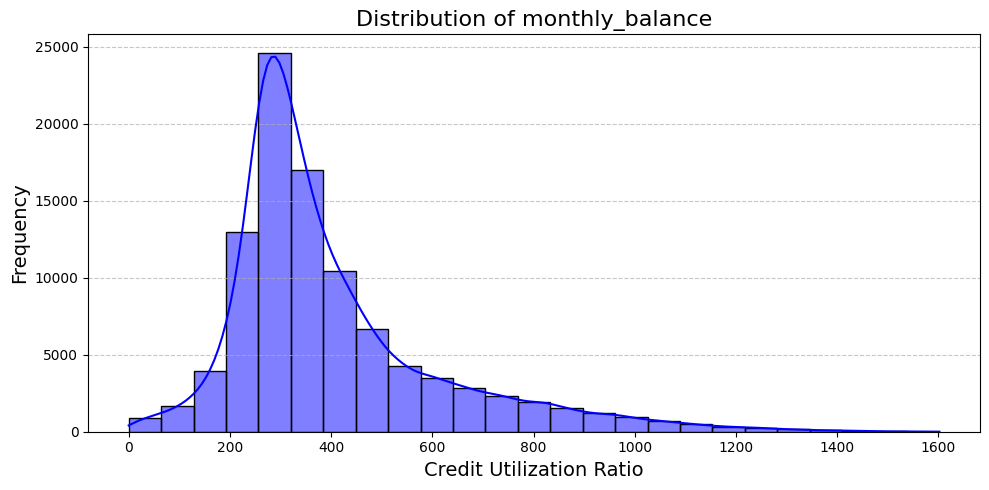

In [280]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df3, x="monthly_balance", bins=25, kde=True, color='blue')

plt.title('Distribution of monthly_balance', fontsize=16)
plt.xlabel('Credit Utilization Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## CREDIT SCORE

In [281]:
# Count the occurrences of each unique value in the 'credit_score' column, including NaN values
df3.credit_score.value_counts(dropna=False)

,count
credit_score,
Standard,53174
Poor,28998
Good,17828


In [282]:
# Grouping the DataFrame by "customer_id"
# For each customer, calculate the number of unique values in the "credit_score" column
# Check if the customer has only one unique credit score (i.e., if the count of unique values is 1)
# Finally, sum up all the True values (i.e., customers with only one unique credit score)

(df3.groupby("customer_id").credit_score.nunique() == 1).sum()

np.int64(5208)

In [283]:
(df3.groupby("customer_id").credit_score.nunique() == 2).sum()

np.int64(7262)

In [284]:
(df3.groupby("customer_id").credit_score.nunique() == 3).sum()

np.int64(30)

- Although there are 3 different **payment_behaviour** values for the same **customer_id**, which initially appear as outliers, upon further examination, we observe that various factors may contribute to these differences. Therefore, we cannot definitively categorize them as either correct or outlier values. Since these cases are relatively few in number, their impact on the model is minimal. For this reason, we will accept these values as they are, without modifying them, and proceed with the modeling process. The selected model should provide the most accurate results based on the data provided.

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df3["credit_score"].value_counts(),
        labels=df3["credit_score"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("credit_score Distribution")
plt.axis('equal')
plt.show()

In [286]:
# Map the 'credit_score' column in df3 to numerical values for easier processing
# "Good" -> 2, "Standard" -> 1, "Poor" -> 0
# After mapping, ensure the column's data type is explicitly converted to integer
df3['credit_score'] = df3['credit_score'].map({
    "Good": 2,       # Assign 2 for "Good"
    "Standard": 1,   # Assign 1 for "Standard"
    "Poor": 0        # Assign 0 for "Poor"
}).astype(int)       # Convert the mapped values to integer type

<ipython-input-286-434639279>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['credit_score'] = df3['credit_score'].map({


In [ ]:
df3.info()

- All the data in **Part 3** has been successfully filled without any data loss. As seen in the table, the number of rows in all columns should be 100,000, indicating that the data was properly handled and completed.

# DATA VISUALIZATION

In [353]:
# Join df1 with df2 (after removing the 'customer_id' column from df2) and then join with df3 (after removing 'customer_id' from df3).
df = df1.join(df2.drop(columns=['customer_id'])).join(df3.drop(columns=['customer_id']))

# Remove duplicate columns, if any, keeping only the first occurrence of each column.
df = df.loc[:, ~df.columns.duplicated()]

# Display the first few rows of the final DataFrame.
df.head()

,id,customer_id,month,name,age,credit_history_age,ssn,occupation,annual_income,monthly_inhand_salary,...,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.00,49.00,821-00-0265,Scientist,19114.12,1824.84,...,11.27,4.00,Good,809.98,26.82,No,80.42,High_spent_Small_value_payments,312.49,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.00,3.00,821-00-0265,Scientist,19114.12,1824.84,...,11.27,4.00,Good,809.98,31.94,No,118.28,Low_spent_Large_value_payments,284.63,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.00,57.00,821-00-0265,Scientist,19114.12,1824.84,...,11.27,4.00,Good,809.98,28.61,No,81.70,Low_spent_Medium_value_payments,331.21,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.00,44.00,821-00-0265,Scientist,19114.12,1824.84,...,6.27,4.00,Good,809.98,31.38,No,199.46,Low_spent_Small_value_payments,223.45,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.00,12.00,821-00-0265,Scientist,19114.12,1824.84,...,11.27,4.00,Good,809.98,24.80,No,41.42,High_spent_Medium_value_payments,341.49,2


In [292]:
def optimize_dtypes(df):
    # Iterate over numeric columns
    for col in df.select_dtypes(include=[np.number]).columns:
        if pd.api.types.is_float_dtype(df[col]):
            if (df[col] % 1 == 0).all():  # Check if all float values are whole numbers
                # Convert float to the smallest suitable integer type
                df[col] = pd.to_numeric(df[col], downcast='integer')
            else:
                # Convert to the smallest suitable float type
                df[col] = pd.to_numeric(df[col], downcast='float')
        elif pd.api.types.is_integer_dtype(df[col]):
            # Convert integer to the smallest suitable integer type
            df[col] = pd.to_numeric(df[col], downcast='integer')

    return df

# Example usage:
df = optimize_dtypes(df)

- This code was written to optimize the data types of numeric columns in a pandas DataFrame. Its purpose is to reduce memory usage and improve performance by shrinking unnecessarily large data types. For example, it converts columns of type `int64` or `float64` to smaller and more appropriate data types such as `int8`, `int16`, `int32` or `float32` depending on the data range This saves memory and speeds up the process.

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int8   
 5   credit_history_age        100000 non-null  int16  
 6   ssn                       100000 non-null  object 
 7   occupation                100000 non-null  object 
 8   annual_income             100000 non-null  float64
 9   monthly_inhand_salary     100000 non-null  float32
 10  total_emi_per_month       100000 non-null  float32
 11  num_bank_accounts         100000 non-null  int8   
 12  num_credit_card           100000 non-null  int8   
 13  interest_rate             100000 non-null  int8   

In [294]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.00,35.20,9.16,20.00,28.00,35.00,42.00,56.00
credit_history_age,100000.00,122.79,93.45,0.00,44.00,103.00,188.00,404.00
annual_income,100000.00,50505.12,38299.42,7005.93,19342.97,36999.71,71683.47,179987.28
monthly_inhand_salary,100000.00,4197.33,3186.89,303.65,1626.72,3092.27,5958.70,15204.63
total_emi_per_month,100000.00,105.54,125.81,0.00,29.05,66.03,145.58,1779.10
num_bank_accounts,100000.00,5.37,2.59,0.00,3.00,5.00,7.00,11.00
num_credit_card,100000.00,5.53,2.07,0.00,4.00,5.00,7.00,10.00
interest_rate,100000.00,14.53,8.74,1.00,7.00,13.00,20.00,34.00
num_of_loan,100000.00,3.53,2.45,0.00,2.00,3.00,5.00,9.00
delay_from_due_date,100000.00,21.07,14.86,-5.00,10.00,18.00,28.00,67.00


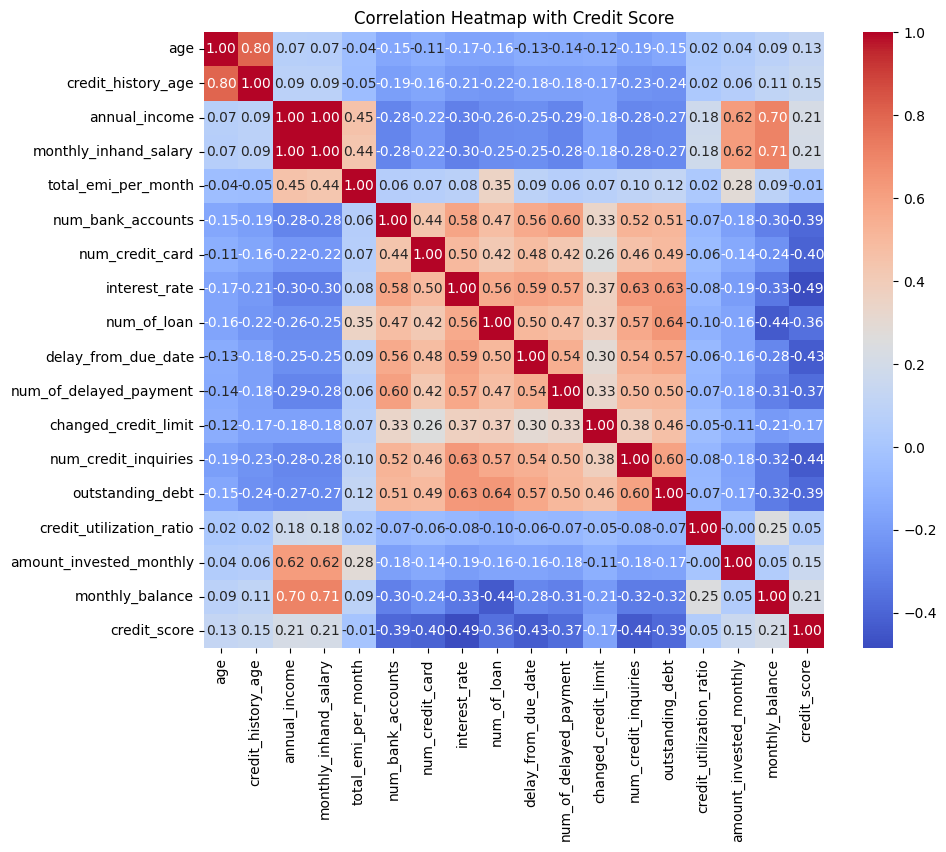

In [295]:
# Select only numeric columns from the DataFrame to compute correlations
numeric_df = df.select_dtypes(include="number")

# Set the figure size for better visualization
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap to visualize correlations
sns.heatmap(
    correlation_matrix,          # The correlation matrix to plot
    annot=True,                  # Show correlation values on the heatmap
    cmap='coolwarm',             # Use a diverging colormap to highlight differences
    fmt='.2f'                    # Format the correlation values to 2 decimal places
)

# Add a title to the plot
plt.title("Correlation Heatmap with Credit Score")

# Display the heatmap
plt.show()

This correlation heatmap shows the relationship between various financial and demographic variables with the credit score. The correlation coefficient ranges between -1 and +1. The closer the value is to **+1**, the stronger the **positive relationship**; the closer it is to **-1**, the stronger the **negative relationship**. Values near zero indicate a weak or no relationship.

### **Insights:**

#### **1. Variables with the Strongest Negative Correlation with Credit Score**  
These variables tend to decrease the credit score:  
- **`credit_utilization_ratio` (-0.53):** The credit utilization ratio has the strongest negative correlation with the credit score. As the credit utilization increases, the credit score decreases, indicating that higher credit usage is associated with financial risk.  
- **`num_of_delayed_payment` (-0.42):** The number of delayed payments significantly negatively impacts the credit score. More delayed payments result in a lower credit score.  
- **`outstanding_debt` (-0.39):** As the amount of outstanding debt increases, the credit score decreases. This suggests that individuals struggling with unpaid debts tend to have lower credit scores.

#### **2. Variables with the Strongest Positive Correlation with Credit Score**  
These variables tend to increase the credit score:  
- **`monthly_inhand_salary` (+0.39):** Monthly in-hand salary has a moderately positive relationship with the credit score. Higher salaries indicate a better credit score.  
- **`num_credit_card` (+0.24):** The number of credit cards held shows a positive correlation. Responsible use of credit cards can improve the credit score.  
- **`credit_history_age` (+0.29):** The age of credit history has a positive relationship with the credit score. Individuals with a longer credit history generally have higher credit scores.

#### **3. Variables with Weak or Insignificant Correlation**  
The following variables have a weak relationship with the credit score:  
- **`age` (+0.14):** Age has a very weak positive relationship with the credit score.  
- **`total_emi_per_month` (+0.11):** The total monthly EMI payments have a weak positive correlation with the credit score.  
- **`num_bank_accounts` (-0.04):** The number of bank accounts has almost no effect on the credit score.

---

### **General Observations:**  
1. **Negative Influences**: The most significant factors that decrease the credit score are the **credit utilization ratio**, **number of delayed payments**, and **outstanding debt**. These factors highlight financial instability.  
2. **Positive Influences**: Higher salaries, having more credit cards, and a longer credit history positively impact the credit score.  
3. **Key Factors**: For building a machine learning model, **`credit_utilization_ratio`**, **`num_of_delayed_payment`**, and **`outstanding_debt`** should be prioritized as the most important variables.  
4. **Low-Impact Factors**: Variables like age and the number of bank accounts are of secondary importance in the analysis.

Based on this information, critical factors can be selected to develop an effective credit score classification model.

In [296]:
# Select all numeric columns from the DataFrame except the last one (usually the target column)
numeric_columns = df.select_dtypes(include=[np.number]).columns[:-1]

# Display the list of numeric columns (excluding the target column)
numeric_columns

Index(['age', 'credit_history_age', 'annual_income', 'monthly_inhand_salary',
       'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'amount_invested_monthly', 'monthly_balance'],
      dtype='object')

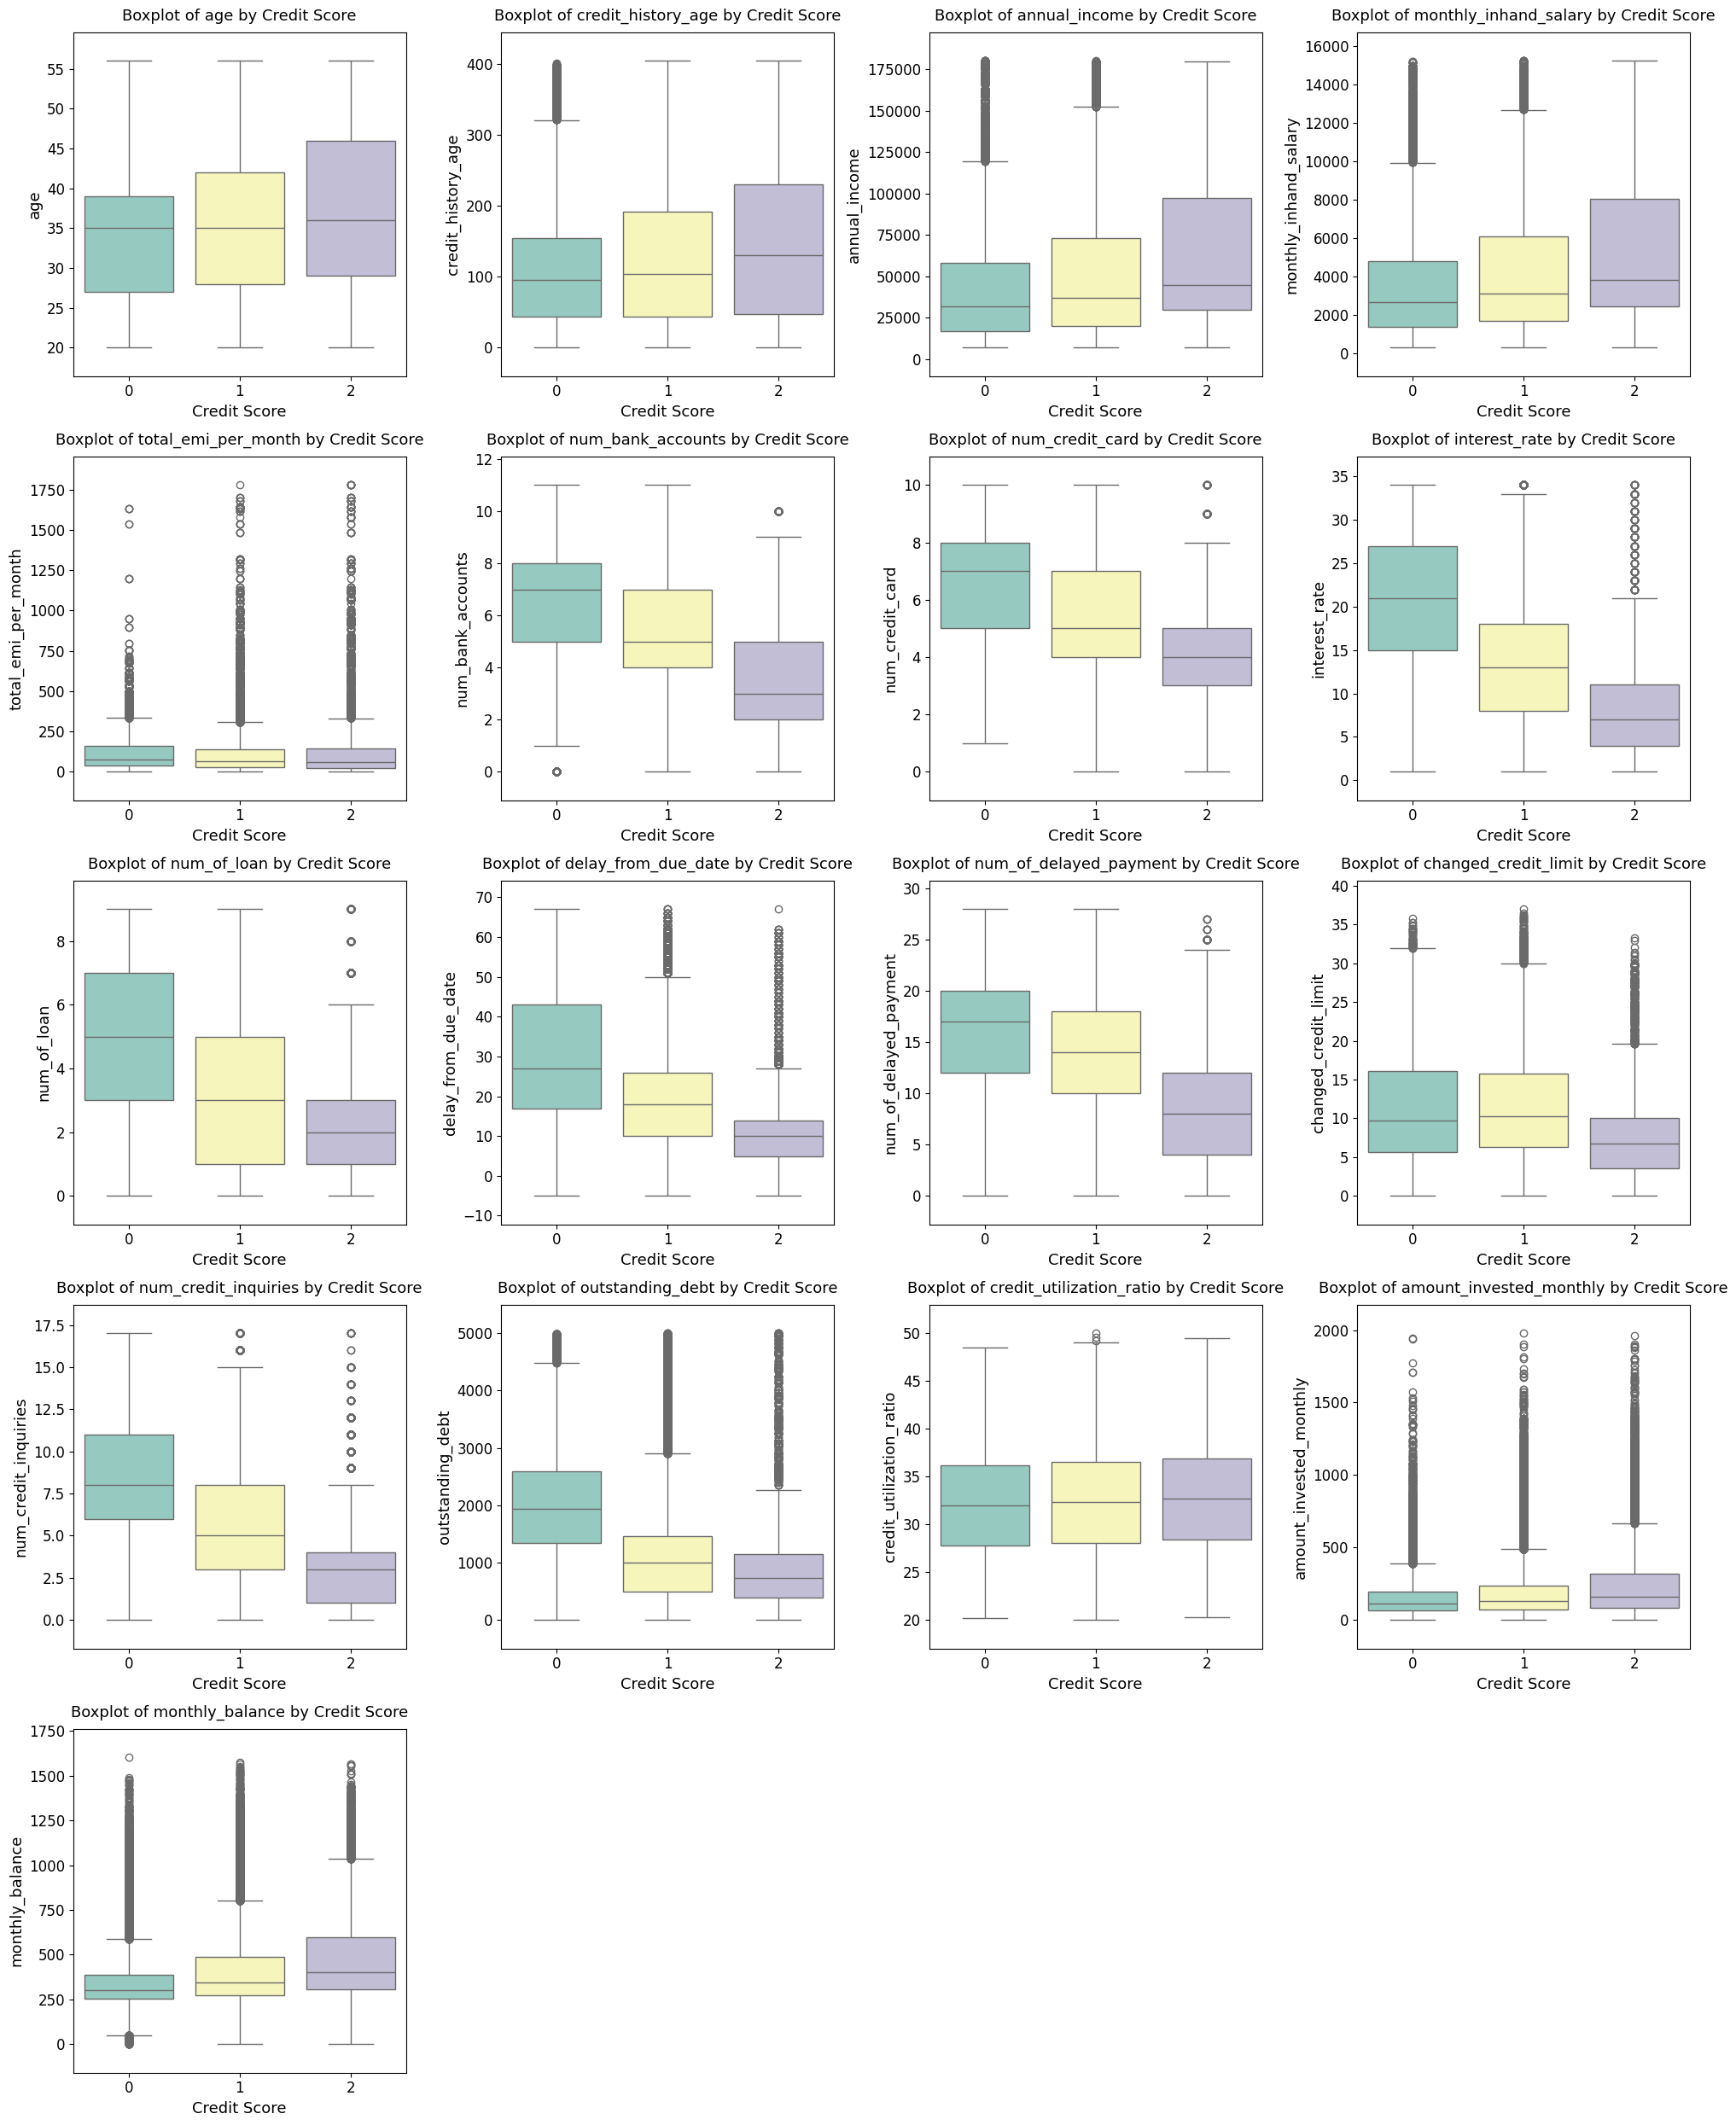

In [297]:
# Calculate number of rows and columns
num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

# Plotting
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='credit_score', y=col, data=df, palette='Set3')
    plt.title(f'Boxplot of {col} by Credit Score', fontsize=13, pad=10)
    plt.xlabel('Credit Score', fontsize=13)
    plt.ylabel(col, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Automatically adjust y-axis limits
    plt.ylim(df[col].min() - (df[col].max() - df[col].min()) * 0.1,
             df[col].max() + (df[col].max() - df[col].min()) * 0.1)

# Adjust horizontal (wspace) and vertical (hspace) spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.7)

plt.tight_layout()

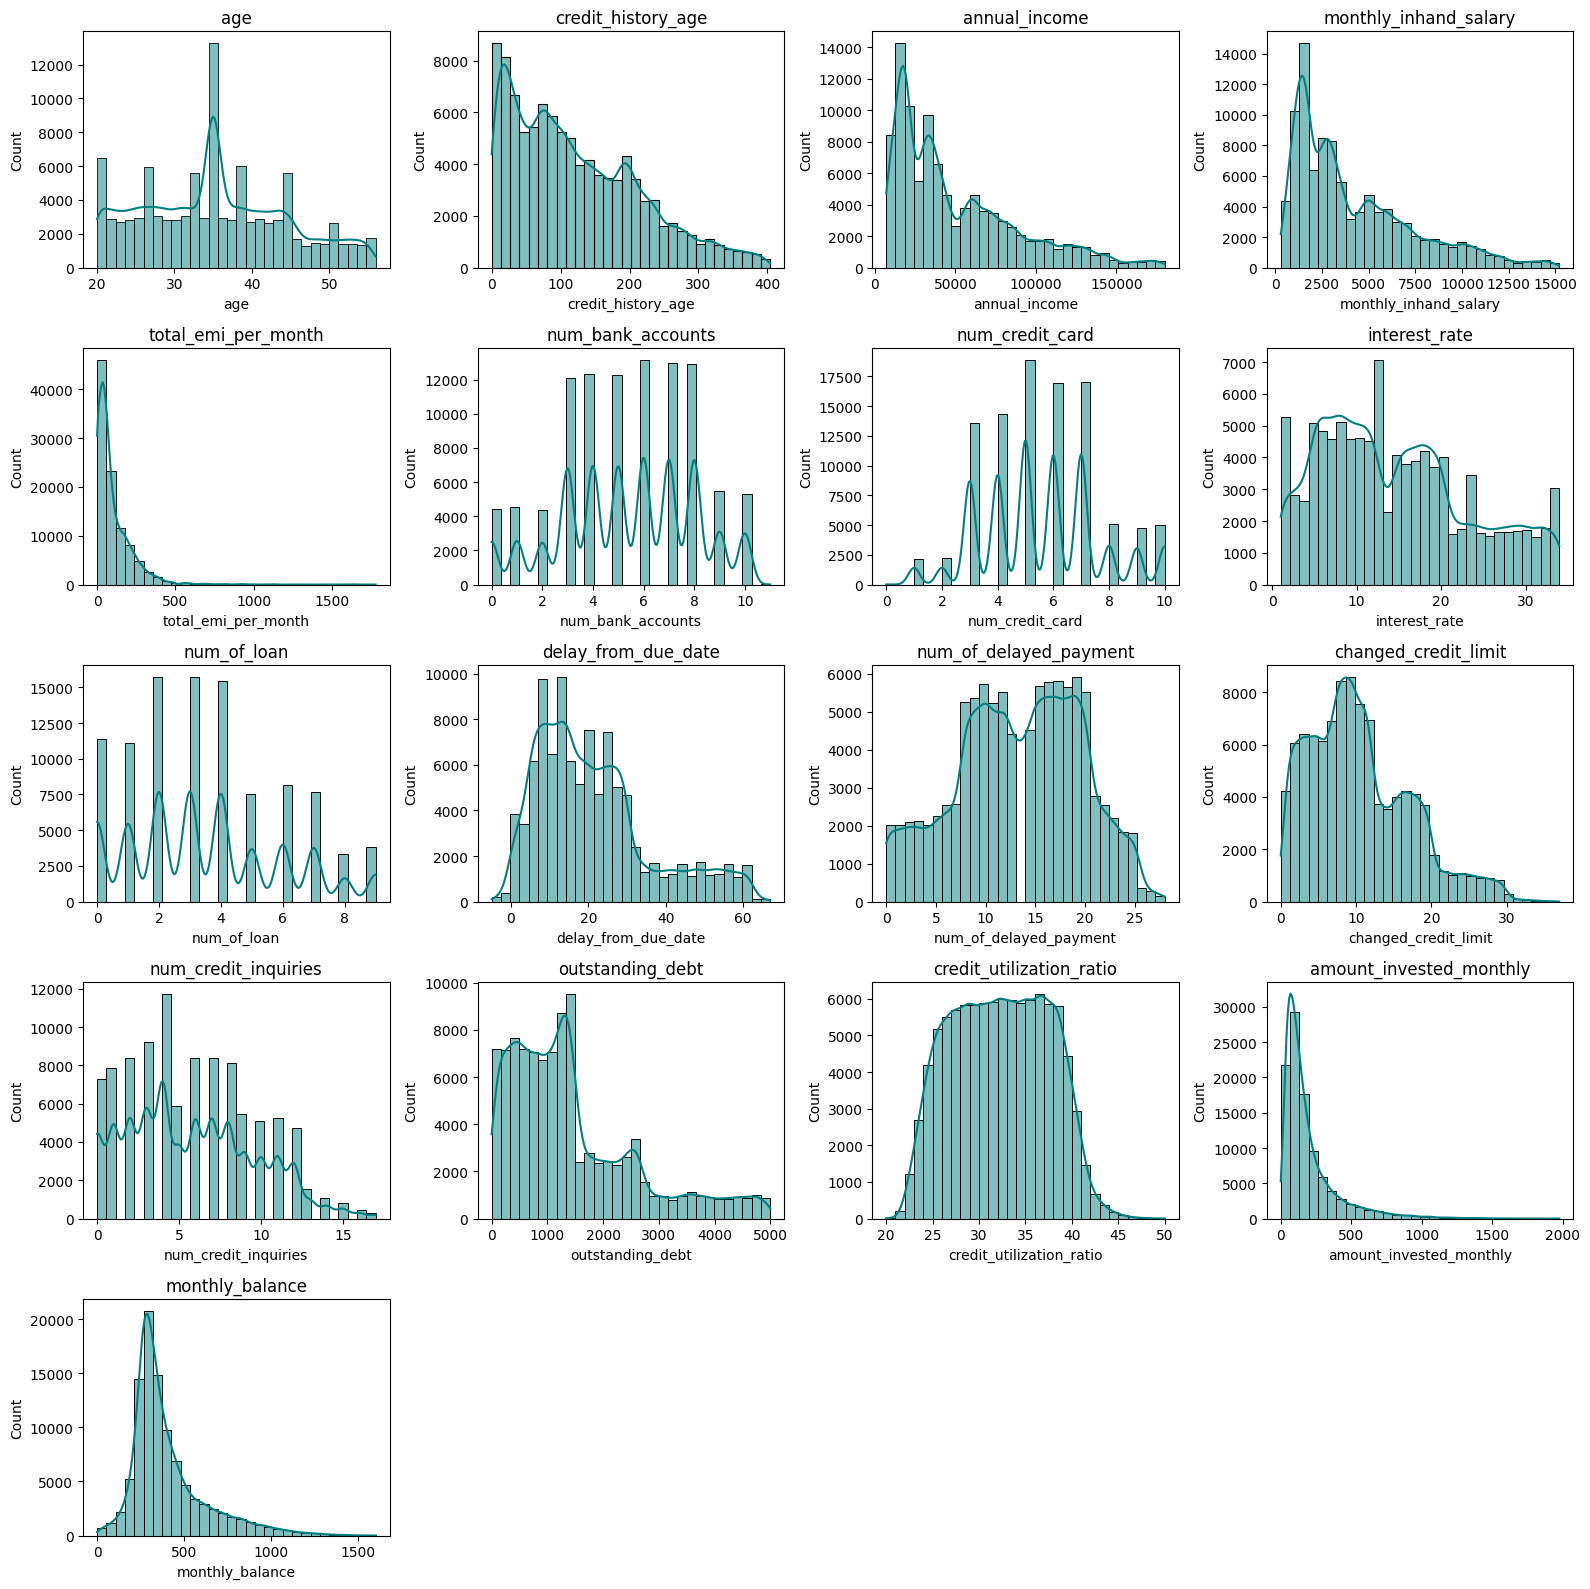

In [308]:
plt.figure(figsize=(16, 16))

for i, col in enumerate(df[numeric_columns].columns, 1):
    plt.subplot(5, 4, i)  # 4 hàng, 5 cột (tuỳ chỉnh theo số biến)
    sns.histplot(df[col], bins=30, kde=True, color='teal')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [316]:
# Save the DataFrame 'df' to a CSV file named 'credit_score_train.csv'
# The 'index=False' argument ensures that the index of the DataFrame is not written to the file
# df.to_csv("data/credit_score_train_cleaned.csv", index=False)

# encoding

In [338]:
df4=df.copy()

In [340]:
from sklearn.preprocessing import MultiLabelBinarizer

df4["type_of_loan"] = df4["type_of_loan"].apply(lambda x: x if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
loan_encoded = mlb.fit_transform(df4["type_of_loan"])
loan_encoded_df = pd.DataFrame(loan_encoded, columns=mlb.classes_)
loan_encoded_df.head()
df_cat = loan_encoded_df
# Ghép lại với DataFrame gốc
# df_cat = pd.concat([df4.drop(columns=["type_of_loan"]), loan_encoded_df], axis=1)


In [347]:
# Credit_Mix: Bad = 0, Standard = 1, Good = 2
credit_mix_mapping = {
    'Bad': 0,
    'Standard': 1,
    'Good': 2
}

df4['credit_mix'].map(credit_mix_mapping)
df_cat['credit_mix'] = df4['credit_mix'].map(credit_mix_mapping)


In [343]:
# Payment_of_Min_Amount: No = 0, Yes = 1, NM (No Mention) = -1
payment_min_mapping = {
    'No': 0,
    'Yes': 1,
    # 'NM': -1
}
df_cat['payment_of_min_amount'] = df4['payment_of_min_amount'].map(payment_min_mapping)


In [344]:
# Payment_Behaviour: mã hóa 6 nhóm cụ thể
payment_behaviour_mapping = {
    'High_spent_Large_value_payments': 0,
    'High_spent_Medium_value_payments': 1,
    'High_spent_Small_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'Low_spent_Medium_value_payments': 4,
    'Low_spent_Small_value_payments': 5
}
df_cat['payment_behaviour'] = df4['payment_behaviour'].map(payment_behaviour_mapping)


In [348]:
df_cat

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,credit_mix,payment_of_min_amount,payment_behaviour
0,1,1,0,1,0,0,0,0,1,0,2,0,2
1,1,1,0,1,0,0,0,0,1,0,2,0,3
2,1,1,0,1,0,0,0,0,1,0,2,0,4
3,1,1,0,1,0,0,0,0,1,0,2,0,5
4,1,1,0,1,0,0,0,0,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,1,2,0,0
99996,1,0,0,0,0,0,0,0,0,1,2,0,1
99997,1,0,0,0,0,0,0,0,0,1,2,0,0
99998,1,0,0,0,0,0,0,0,0,1,2,0,3


In [346]:
df_cat.isna().sum()

,0
Auto Loan,0
Credit-Builder Loan,0
Debt Consolidation Loan,0
Home Equity Loan,0
Mortgage Loan,0
No Loan,0
Not Specified,0
Payday Loan,0
Personal Loan,0
Student Loan,0


In [317]:
def remove_highly_correlated_features(df, threshold=0.9):
    # Chỉ lấy các cột số
    corr_matrix = df.corr(numeric_only=True).abs()

    # Lấy upper triangle (tam giác trên) để tránh trùng lặp
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Tìm các cột có tương quan lớn hơn ngưỡng
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    print(f"Các cột bị loại do tương quan cao (> {threshold}): {to_drop}")
    df = df.drop(columns=to_drop)

remove_highly_correlated_features(df)

Các cột bị loại do tương quan cao (> 0.9): ['monthly_inhand_salary']


<Axes: >

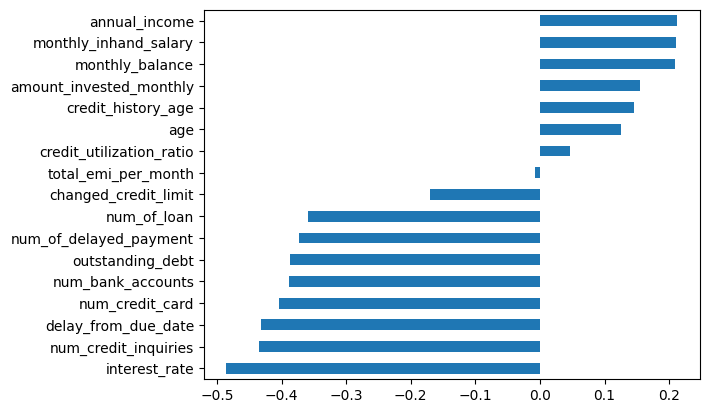

In [319]:
correlation_series = df.corr(numeric_only=True)['credit_score'][:-1].sort_values()
correlation_series.plot.barh()

In [354]:
df = pd.concat([df_cat.reset_index(drop=True), df.reset_index(drop=True).drop(['credit_mix',	'payment_of_min_amount',	'payment_behaviour'], axis = 1)], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Auto Loan                 100000 non-null  int64  
 1   Credit-Builder Loan       100000 non-null  int64  
 2   Debt Consolidation Loan   100000 non-null  int64  
 3   Home Equity Loan          100000 non-null  int64  
 4   Mortgage Loan             100000 non-null  int64  
 5   No Loan                   100000 non-null  int64  
 6   Not Specified             100000 non-null  int64  
 7   Payday Loan               100000 non-null  int64  
 8   Personal Loan             100000 non-null  int64  
 9   Student Loan              100000 non-null  int64  
 10  credit_mix                100000 non-null  int64  
 11  payment_of_min_amount     100000 non-null  int64  
 12  payment_behaviour         100000 non-null  int64  
 13  id                        100000 non-null  ob

In [355]:
df = df.drop([
    "id", "customer_id", "name", "ssn", "type_of_loan", 'month', 'occupation'], axis=1)

df.head()

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,...,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,amount_invested_monthly,monthly_balance,credit_score
0,1,1,0,1,0,0,0,0,1,0,...,4.00,3,7.00,11.27,4.00,809.98,26.82,80.42,312.49,2
1,1,1,0,1,0,0,0,0,1,0,...,4.00,-1,7.00,11.27,4.00,809.98,31.94,118.28,284.63,2
2,1,1,0,1,0,0,0,0,1,0,...,4.00,3,7.00,11.27,4.00,809.98,28.61,81.70,331.21,2
3,1,1,0,1,0,0,0,0,1,0,...,4.00,5,4.00,6.27,4.00,809.98,31.38,199.46,223.45,2
4,1,1,0,1,0,0,0,0,1,0,...,4.00,6,4.00,11.27,4.00,809.98,24.80,41.42,341.49,2


In [356]:
from sklearn.model_selection import train_test_split

X = df.drop("credit_score", axis=1)
y = df["credit_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [358]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler

# Columns to apply RobustScaler
robust_columns = ['total_emi_per_month', 'amount_invested_monthly', 'monthly_balance', "annual_income", "monthly_inhand_salary"]

# Columns to apply StandardScaler (All columns except robust columns)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Create the ColumnTransformer
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)])

# Apply to training data
X_train_scaled= scaler.fit_transform(X_train)

# Apply to test data
X_test_scaled = scaler.transform(X_test)

# Regression Softmax

In [360]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

In [361]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[3879 1025  895]
 [2215 6279 2141]
 [  92  487 2987]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      5799
           1       0.81      0.59      0.68     10635
           2       0.50      0.84      0.62      3566

    accuracy                           0.66     20000
   macro avg       0.64      0.70      0.65     20000
weighted avg       0.70      0.66      0.66     20000



In [362]:
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.6554
Test Accuracy: 0.6573


# Logistic Regression


In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tạo mô hình
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [364]:
# Scale dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Dự đoán
y_pred = model.predict(X_test_scaled)

# Đánh giá
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
print("Báo cáo phân loại:\n", classification_report(y_test, y_pred))

Độ chính xác: 0.4691
Ma trận nhầm lẫn:
 [[1177 4448  174]
 [2816 7406  413]
 [1277 1490  799]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.22      0.20      0.21      5799
           1       0.56      0.70      0.62     10635
           2       0.58      0.22      0.32      3566

    accuracy                           0.47     20000
   macro avg       0.45      0.37      0.38     20000
weighted avg       0.46      0.47      0.45     20000



In [365]:

# Độ chính xác trên tập huấn luyện và kiểm tra
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

# In kết quả
print(f"Train Accuracy (Logistic Regression): {train_accuracy:.4f}")
print(f"Test Accuracy (Logistic Regression): {test_accuracy:.4f}")


Train Accuracy (Logistic Regression): 0.4714
Test Accuracy (Logistic Regression): 0.4691


# RandomForest

In [366]:
from sklearn.ensemble import RandomForestClassifier

# Tạo mô hình
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [367]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dự đoán
y_pred = model.predict(X_test_scaled)

# Đánh giá
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
print("Báo cáo phân loại:\n", classification_report(y_test, y_pred))

Độ chính xác: 0.8148
Ma trận nhầm lẫn:
 [[4880  902   17]
 [1211 8705  719]
 [  17  838 2711]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      5799
           1       0.83      0.82      0.83     10635
           2       0.79      0.76      0.77      3566

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.81      0.81     20000



In [368]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test_scaled)

# Đánh giá
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
print("Báo cáo phân loại:\n", classification_report(y_test, y_pred))

Độ chính xác: 0.53175
Ma trận nhầm lẫn:
 [[    0  5799     0]
 [    0 10635     0]
 [    0  3566     0]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5799
           1       0.53      1.00      0.69     10635
           2       0.00      0.00      0.00      3566

    accuracy                           0.53     20000
   macro avg       0.18      0.33      0.23     20000
weighted avg       0.28      0.53      0.37     20000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

# Decision Tree

In [369]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Giới hạn độ sâu để tránh overfitting

model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Accuracy trên tập huấn luyện:", accuracy_score(y_train, y_train_pred))
print("Accuracy trên tập kiểm tra:", accuracy_score(y_test, y_test_pred))

print("Báo cáo phân loại trên tập test:")
print(classification_report(y_test, y_test_pred))

Accuracy trên tập huấn luyện: 0.7094125
Accuracy trên tập kiểm tra: 0.7137
Báo cáo phân loại trên tập test:
              precision    recall  f1-score   support

           0       0.73      0.66      0.70      5799
           1       0.76      0.75      0.76     10635
           2       0.58      0.68      0.62      3566

    accuracy                           0.71     20000
   macro avg       0.69      0.70      0.69     20000
weighted avg       0.72      0.71      0.71     20000



# XGBoost

In [370]:
# model XGBoost
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))

Độ chính xác: 0.7697
Ma trận nhầm lẫn:
 [[4354 1268  177]
 [1232 8464  939]
 [  51  939 2576]]


In [374]:
# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.utils.class_weight import compute_class_weight

# TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1

# To disable warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')
tf.config.optimizer.set_jit(False)

# Visualization settings
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

# Pandas Settings
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 200)

In [371]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [372]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [376]:

# Compute class_weights
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: weight for i, weight in zip(np.unique(y_train), class_weights_array)}

In [377]:
tf.random.set_seed(42)

# Model architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu',),
    BatchNormalization(),
    Dropout(0.35),

    Dense(512, activation='relu', kernel_regularizer=l1(1e-4)),
    BatchNormalization(),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(3, activation='softmax')
])

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping with patience and best weight restoration
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=35,
                               restore_best_weights=True)

# Model training
history = model.fit(x=X_train_scaled,
                    y=y_train,
                    validation_data=(X_test_scaled, y_test),
                    batch_size=1024,
                    epochs=100,
                    verbose=1,
                    callbacks=[early_stopping], class_weight=class_weights)

Epoch 1/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.5164 - loss: 1.6459 - val_accuracy: 0.6608 - val_loss: 1.4615
Epoch 2/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.6201 - loss: 1.3869 - val_accuracy: 0.6738 - val_loss: 1.3264
Epoch 3/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.6421 - loss: 1.3298 - val_accuracy: 0.6809 - val_loss: 1.2719
Epoch 4/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.6548 - loss: 1.2894 - val_accuracy: 0.6878 - val_loss: 1.2526
Epoch 5/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.6600 - loss: 1.2598 - val_accuracy: 0.6909 - val_loss: 1.2345
Epoch 6/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.6672 - loss: 1.2271 - val_accuracy: 0.6939 - val_loss: 1.2064
Epoch 7/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.6690 - loss: 1.2004 - val_accuracy: 0.6987 - val_loss: 1.1833
Epoch 8/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.6735 - loss: 1.1713 - val_acc

KeyboardInterrupt: 

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
model.evaluate(X_test_scaled, y_test)

In [ ]:
model.evaluate(X_train_scaled, y_train)

In [ ]:
eval_metric(model, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
model.summary()